<a href="https://colab.research.google.com/github/seanmerritt/Predicting_YELP_Reviews_NLP_Final_Project/blob/main/NLP_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

## Packages

In [ ]:
import pandas as pd

## Crawl websites

In [ ]:
# Grab review content: username, rating, rating date, rounded rating, and review content
# Mark each review with doctorID
def getReviewContent(result: ResultSet, index: int, soup: BeautifulSoup):
    name_list = []
    rating_list = []
    date_list = []
    review_content_list = []
    rounde_rating = soup.find_all(class_ = 'i-stars__373c0___sZu0')[0]['aria-label'].split()[0]
    for i in range(len(result)):
        review_number = len(result[i].find_all(class_ = 'comment__373c0__Nsutg'))
        if review_number > 1:
            name = result[i].find(class_ = 'fs-block css-m6anxm').text
            rating = result[i].find_all(class_ = 'i-stars__373c0___sZu0')
            date = result[i].find_all(class_ = 'css-e81eai')
            review_content = result[i].find_all(class_='comment__373c0__Nsutg')
            for j in range(review_number):
                name_list.append(name)
                rating_list.append(rating[j]['aria-label'].split()[0])
                date_list.append(date[j].text)
                review_content_list.append(review_content[j].text)
        else:
            name = result[i].find(class_ = 'fs-block css-m6anxm').text
            rating = result[i].find(class_ = 'i-stars__373c0___sZu0')['aria-label'].split()[0]
            date = result[i].find(class_ = 'css-e81eai').text
            review_content = result[i].find(class_='comment__373c0__Nsutg').text

            name_list.append(name)
            rating_list.append(rating)
            date_list.append(date)
            review_content_list.append(review_content)
    return {'doctorID': [index]*len(name_list), 
            'username': name_list, 
            'rating': rating_list, 
            'date_of_review': date_list, 
            'review_content': review_content_list, 
            'rounded_rating': [rounde_rating]*len(name_list)}

# Confirm if current page has reviews. return a boolean value.
def haveReview(result: ResultSet):
    if len(result) == 0:
        return False
    else:
        return True

# Confirm if current url is the same as url in original dataset, and return the current url on yelp.
def getCurrentUrl(url: str):
    try:
        res = urllib.request.urlopen(url)
        finalurl = res.geturl()
        if finalurl==url:
            pass
        else:
            url = finalurl
    except requests.exceptions.RequestException as e:
        raise SystemExit(e)
    return url

# Main function to crawl websites
def main():
    temp_list = []
    df_url = pd.read_excel('file path of dataset storing urls')

# the number in range refers to doctorID in original dataset.
    for i in range(294, 296):
        url = df_url['URL'][i]
        url = getCurrentUrl(url)
        print("the " + str(i) + "th URL is being crawled")
        try:
            response = requests.get(url).text
        except requests.exceptions.RequestException as e:
            raise SystemExit(e)
        time.sleep(random.randint(20, 30))
        # Use BeautifulSoup to parse HTML
        soup = BeautifulSoup(response,'html.parser')
        result = soup.findAll(class_="review__373c0__3MsBX")
        index = 0
        # a while loop to go through all subpages of each business, until there is no review in current page.
        while(haveReview(result)):
            temp_dict = getReviewContent(result, i, soup)
            temp_list.append(temp_dict)
            index += 1
            try:
                response = requests.get(url + "?start=" + str(index*10)).text
            except requests.exceptions.RequestException as e:
                raise SystemExit(e)
            # Use BeautifulSoup to parse HTML
            soup = BeautifulSoup(response,'html.parser')
            result = soup.findAll(class_="review__373c0__3MsBX")
        print("the " + str(i) + "th URL is finished")
    
    df = pd.DataFrame(temp_list[0])
    for i in range(1, len(temp_list)):
        tmp_df = pd.DataFrame(temp_list[i])
        df = df.append(tmp_df, ignore_index=True)
    df.to_csv('file path to store data', index=False)

## Compile dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Mounted at /content/drive


In [ ]:
# This is a function to create rounded rating according to average rating of business
def roundRating(rating: float):
    newRating = int(rating)
    dif = rating - newRating
    if dif >= 0.75:
        return newRating + 1
    elif dif < 0.75 and dif >= 0.25:
        return newRating + 0.5
    else:
        return newRating

In [ ]:
df_all = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/url_0_to_2606.csv', encoding='utf-8')

In [ ]:
df_all

,doctorID,username,rating,date_of_review,review_content,rounded_rating
0,0,Whitney W.,5,5/27/2021,After seeing 4.5 stars reviews on a family pra...,4.5
1,0,George S.,5,6/3/2021,Love this healthcare provider!! Dr Singh is th...,4.5
2,0,Andrew P.,1,12/15/2020,Ravinder Singh attempted to scold me once I fo...,4.5
3,0,Brian S.,5,12/31/2020,The docs in this office are always professiona...,4.5
4,0,Mina R.,5,4/11/2021,Dr. Singh is one of the best physicians I've c...,4.5
...,...,...,...,...,...,...
52686,2367,C S.,5,4/29/2019,"Excellent Doctor, he determined my problem, ra...",4.0
52687,2367,Breanna S.,1,6/21/2017,I waited well over a month for an appointment ...,4.0
52688,2367,Tiffany T.,5,6/5/2019,Dr. Saad was very kind and comforting. He seem...,4.0
52689,2367,Dee C.,5,10/25/2017,"A kind, intelligent physician who listens, and...",4.0


In [ ]:
df_all_sorted = df_all.sort_values(by=['doctorID'], ascending=True)

In [ ]:
df_all_sorted = df_all_sorted.reset_index().drop(['index'], axis=1)

In [ ]:
df_all_sorted.head()

,doctorID,username,rating,date_of_review,review_content,rounded_rating
0,0,Whitney W.,5,5/27/2021,After seeing 4.5 stars reviews on a family pra...,4.5
1,0,Kristin R.,5,9/30/2015,I just switched this month to Rancho Wellness ...,4.5
2,0,Allyson F.,5,2/24/2017,"I love Rancho wellness, they are very organiz...",4.5
3,0,Brian J.,5,10/12/2016,Large waiting room and welcoming staff. Dr. S...,4.5
4,0,Stephani P.,5,6/2/2015,My family and I have been going to Dr. Singh f...,4.5


In [ ]:
df_all_sorted.to_csv('/group_project/url_0_to_2606_sorted.csv', index=False)/group_project/url_0_to_2606_sorted.csv

In [ ]:
num_list = [i for i in range(0, 2606)]
doctorIDs = list(df_all_sorted['doctorID'])
missing_ID = []
for num in num_list:
  if num not in doctorIDs:
    missing_ID.append(num)
print(len(missing_ID))
print(missing_ID)
# These are the missing doctorIDs in the dataset. 

112
[16, 60, 65, 126, 151, 164, 221, 241, 249, 271, 278, 283, 301, 315, 318, 329, 333, 340, 350, 386, 401, 402, 416, 418, 423, 427, 435, 448, 450, 462, 465, 471, 479, 490, 491, 494, 495, 498, 503, 509, 515, 523, 561, 575, 604, 636, 638, 640, 784, 795, 804, 815, 829, 870, 879, 970, 971, 973, 979, 992, 1009, 1010, 1017, 1050, 1061, 1064, 1096, 1110, 1134, 1162, 1188, 1190, 1197, 1448, 1476, 1499, 1523, 1529, 1554, 1603, 1607, 1639, 1651, 1675, 1738, 1765, 1767, 1777, 1848, 1894, 1917, 2034, 2090, 2099, 2107, 2129, 2134, 2143, 2193, 2208, 2223, 2233, 2249, 2289, 2377, 2431, 2432, 2433, 2434, 2435, 2436, 2437]


# Task 2

## Import data

In [ ]:
# 4/1AX4XfWiwqqnbmlSsHv7Hg9CDf-amMUeZpLPFuDlcly2fTlHaBROfrOkcgpI
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
# read a local csv file into Pandas DataFrame
%cd /content/drive/MyDrive/NLP Final Project/
df= pd.read_csv('url_0_to_2606_sorted.csv')
import pickle

/content/drive/MyDrive/NLP Final Project


## Contraction expansion

In [ ]:
!pip install contractions
import contractions

     |████████████████████████████████| 283 kB 4.0 MB/s 
     |████████████████████████████████| 321 kB 36.2 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85450 sha256=4ecfe669e2fdfdd0ff0af80843cb7a8478c0244f3d0e05b37a7401aad8b88e4b
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [ ]:
def contraction_expansion(text):
  expanded_word = []    
  for word in text.split():
  # using contractions.fix to expand
    expanded_word.append(contractions.fix(word))   
   
  return  ' '.join(expanded_word)

In [ ]:
df['expanded'] = df['review_content'].apply(contraction_expansion)

## Tokenization

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')
from nltk import wordpunct_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df['tokens'] = df['expanded'].apply(wordpunct_tokenize)

## Lemmatization

In [ ]:
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')
#create a function to lemmatize words based on different POS tag types; 
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
df['tags'] = df['tokens'].apply(pos_tag)

In [ ]:
def lemmatize_POS (tagged_columns):
  wnl = WordNetLemmatizer()
  text=[]
  for word, tag in tagged_columns:
    if tag.startswith('NN'):
      token = wnl.lemmatize(word, pos='n') # n is NOUN 
    elif tag.startswith('VB'):
      token = wnl.lemmatize(word, pos='v') # v is VERB
    elif tag.startswith('JJ'):
      token = wnl.lemmatize(word, pos='a') # a is ADJ
    elif tag.startswith('RB'):
      token = wnl.lemmatize(word, pos='r') # r is ADV
    else:
      token = word
    text.append(token)
  #cleaned_corpus.append(text)
  return text

In [ ]:
df['lemmas'] = df['tags'].apply(lemmatize_POS)

## Normalization

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from string import punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def preprocessing(tokens):
  tokens = [token.lower() for token in tokens] # lowercasing
  
  tokens = [token for token in tokens if not token.isdigit()] # remove digit - isdigit is a python buit-in method. 

  tokens = [token for token in tokens if token not in punctuation] # remove punctuations

  mystopwords = set(stopwords.words("english")) # we use english stopwords list.
  tokens = [token for token in tokens if token not in mystopwords] # remove stopwords
  
  tokens = [token for token in tokens if len(token)>=3] # remove tokens with one or two characters

  return tokens

In [ ]:
df['final'] = df['lemmas'].apply(preprocessing)

In [ ]:
df.head(5)

,Unnamed: 0,doctorID,username,rating,date_of_review,review_content,rounded_rating,expanded,tokens,tags,lemmas,final
0,0,0,Whitney W.,5,5/27/2021,After seeing 4.5 stars reviews on a family pra...,4.5,After seeing 4.5 stars reviews on a family pra...,"[After, seeing, 4, ., 5, stars, reviews, on, a...","[(After, IN), (seeing, VBG), (4, CD), (., .), ...","[After, see, 4, ., 5, star, review, on, a, fam...","[see, star, review, family, practice, rancho, ..."
1,1,0,Kristin R.,5,9/30/2015,I just switched this month to Rancho Wellness ...,4.5,I just switched this month to Rancho Wellness ...,"[I, just, switched, this, month, to, Rancho, W...","[(I, PRP), (just, RB), (switched, VBD), (this,...","[I, just, switch, this, month, to, Rancho, Wel...","[switch, month, rancho, wellness, base, referr..."
2,2,0,Allyson F.,5,2/24/2017,"I love Rancho wellness, they are very organiz...",4.5,"I love Rancho wellness, they are very organize...","[I, love, Rancho, wellness, ,, they, are, very...","[(I, PRP), (love, VBP), (Rancho, NNP), (wellne...","[I, love, Rancho, wellness, ,, they, be, very,...","[love, rancho, wellness, organize, professiona..."
3,3,0,Brian J.,5,10/12/2016,Large waiting room and welcoming staff. Dr. S...,4.5,Large waiting room and welcoming staff. Dr. Si...,"[Large, waiting, room, and, welcoming, staff, ...","[(Large, JJ), (waiting, VBG), (room, NN), (and...","[Large, wait, room, and, welcoming, staff, ., ...","[large, wait, room, welcoming, staff, singh, p..."
4,4,0,Stephani P.,5,6/2/2015,My family and I have been going to Dr. Singh f...,4.5,My family and I have been going to Dr. Singh f...,"[My, family, and, I, have, been, going, to, Dr...","[(My, PRP$), (family, NN), (and, CC), (I, PRP)...","[My, family, and, I, have, be, go, to, Dr, ., ...","[family, singh, year, actually, follow, anothe..."


In [ ]:
%cd /content/drive/MyDrive/NLP Final Project/
df.to_pickle('prepared_data')

/content/drive/MyDrive/NLP Final Project


# Task 3

* word embeddings - Sean
* tf-idf - Sonia
* NER tags - Siyu
* summary statistics - Sean 
* aggregated by business

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
# read a local csv file into Pandas DataFrame
%cd /content/drive/MyDrive/NLP Final Project/
df = pd.read_pickle('prepared_data')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/NLP Final Project


## Summary 

In [ ]:
def lexical_diversity(text):
    """
    A measure of the lexical richness of the text
    """
    return len(text)/(len(set(text))+1)

In [ ]:
review_table = []
for index, row in df.iterrows():
  review_table.append([len(row['tokens']), len(row['final']), lexical_diversity(row['final'])])

In [ ]:
ReviewTable = pd.DataFrame(review_table, columns = ['Message Length', 'Clean Length', 'Lexical Diversity'])
ReviewTable[:5]

,Message Length,Clean Length,Lexical Diversity
0,74,32,1.142857
1,148,59,1.229167
2,90,39,1.181818
3,43,18,1.000000
4,95,33,1.137931


In [ ]:
ReviewTable.describe()

,Message Length,Clean Length,Lexical Diversity
count,52691.000000,52691.000000,52691.000000
mean,134.395912,53.765634,1.135090
std,129.286803,50.591810,0.183093
min,1.000000,0.000000,0.000000
25%,54.000000,22.000000,1.000000
50%,95.000000,38.000000,1.107143
75%,166.000000,66.000000,1.222222
max,1159.000000,467.000000,17.142857


In [ ]:
ReviewTable.corr()

,Message Length,Clean Length,Lexical Diversity
Message Length,1.000000,0.992989,0.731130
Clean Length,0.992989,1.000000,0.731535
Lexical Diversity,0.731130,0.731535,1.000000


In [ ]:
df['Length'] = df['final'].apply(len)
df['Lexical Diversity'] = df['final'].apply(lexical_diversity)

In [ ]:
print(df['rating'].describe(),df['rounded_rating'].describe())


count    52691.000000
mean         3.091704
std          1.889864
min          1.000000
25%          1.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64 count    52691.000000
mean         3.100330
std          0.990923
min          1.000000
25%          2.500000
50%          3.000000
75%          4.000000
max          5.000000
Name: rounded_rating, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df['rating'].value_counts().sort_index()

1    21729
2     2606
3     1566
4     2684
5    24106
Name: rating, dtype: int64

Text(0, 0.5, 'Frequency')

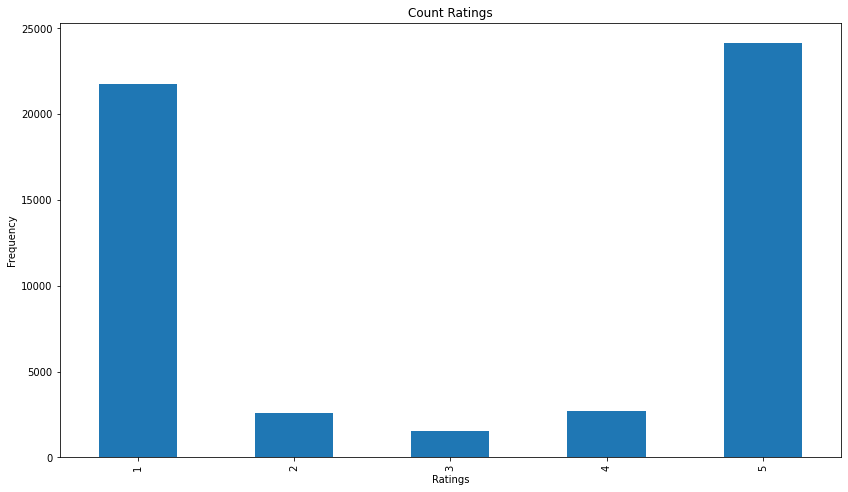

In [ ]:
ax = df['rating'].value_counts().sort_index().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count Ratings")
ax.set_xlabel("Ratings")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

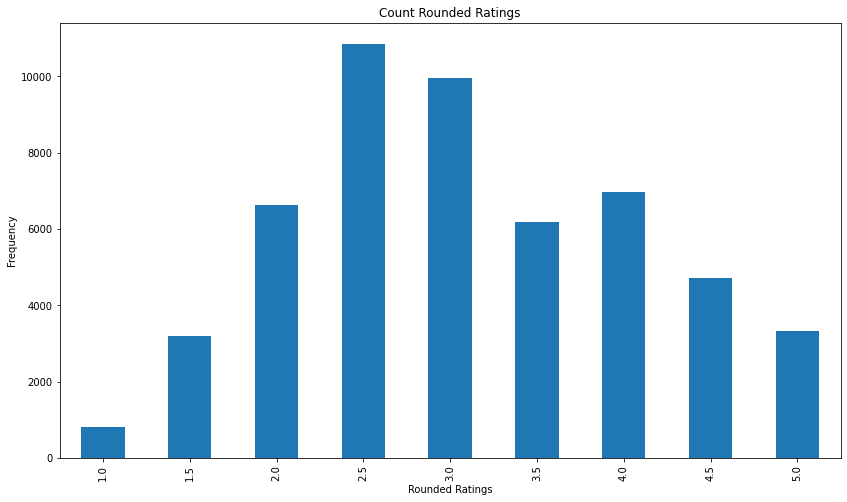

In [ ]:
ax = df['rounded_rating'].value_counts().sort_index().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count Rounded Ratings")
ax.set_xlabel("Rounded Ratings")
ax.set_ylabel("Frequency")

## Word Embeddings

In [ ]:
import gensim
import gensim.downloader as api

pre_ft_vectors = api.load('glove-twitter-200')

[==================================================] 100.0% 758.5/758.5MB downloaded


In [ ]:
review_list = df['final'].to_list()
review_list = [' '.join(message) for message in review_list]
corpus = [doc.split() for doc in review_list]
id2word = gensim.corpora.Dictionary(corpus)

In [ ]:
from gensim.corpora import Dictionary

In [ ]:
pickle.dump(corpus, open('corpus.pkl','wb'))
pickle.dump(id2word, open('id2word.pkl','wb'))

In [ ]:
one_perc = len(df.index)*0.01
# create a token list with a minimal document frequency count (number of documents which a token occurs)
token_list =[]
for token, count in id2word.dfs.items(): # .dfs returns doctument frequecy based on token id (int)
  if count > one_perc:
    token_list.append(id2word.get(token)) #.get() retrieve the actual tokens based on id

In [ ]:
vector_list = [pre_ft_vectors[word] for word in token_list if word in pre_ft_vectors.vocab]

In [ ]:
words = [word for word in token_list if word in pre_ft_vectors.vocab]

In [ ]:
vec_zip = zip(token_list, vector_list)

In [ ]:
word_vec_dict = dict(vec_zip)
df_word = pd.DataFrame.from_dict(word_vec_dict, orient='index')
df_word.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
see,0.381280,0.952290,-0.22360,-0.000701,-0.25439,0.501150,1.03390,0.137270,-0.098981,0.29085,0.075632,0.259070,-0.787890,-0.098828,-0.318430,-0.22705,0.219920,-0.256800,-0.023992,-0.22362,0.209010,-0.063092,-0.019972,0.51637,-0.010969,0.54527,-0.055798,-0.212030,0.228810,-0.467870,-0.13539,0.42674,-0.018245,0.108020,-0.129970,0.097118,0.14715,-0.107070,0.189470,-0.110050,...,0.012852,0.14578,-0.18293,0.111010,-0.317700,-0.056756,-0.16985,-0.299240,-0.353910,0.33189,-0.405190,0.22092,-0.038152,0.34441,-0.216490,0.18566,-0.196000,-0.200140,-0.025878,-0.22317,0.33448,0.162810,0.31304,-0.16490,-0.245370,-0.181240,0.58900,-0.246050,0.19595,0.28030,-0.028354,0.353060,0.203930,-0.34911,-0.088513,-0.478440,0.52337,-0.407160,-0.109480,-0.249810
star,-0.082023,0.301080,-0.51508,-0.659520,-0.14611,-0.611460,-0.26568,-0.115780,0.656240,-0.68257,0.030081,-0.077002,-0.122150,0.727990,-0.049490,0.11321,0.543070,-0.131100,0.047132,-0.33657,-0.247140,-0.362380,0.266210,-0.56173,-0.001253,-0.31764,-0.529790,-0.258670,0.231630,-0.148280,0.67383,-0.25845,0.137580,-0.293200,0.125820,0.603140,0.70976,0.381670,0.320950,-0.541920,...,0.089628,0.56048,-0.12480,-0.348510,-0.366770,0.454830,0.17677,-0.024119,-0.086595,-0.16427,-0.081961,-0.02514,0.257180,0.48749,0.946640,0.54783,0.092482,-0.186610,-0.502150,0.48761,0.32144,-0.246030,0.16073,-0.44192,0.013751,0.339960,0.19815,-0.044714,0.15840,0.74563,-0.088035,-0.377520,-0.164360,-0.64797,0.390690,0.025142,0.40283,-0.062974,-0.013045,-0.898590
review,-0.106200,0.379150,-0.41743,-0.457380,-0.28988,-0.095960,0.26371,-0.005914,0.172610,-0.84185,-0.117890,0.140080,-0.999540,-0.037367,0.089276,-0.27306,-0.026919,-0.195370,0.383860,0.12481,0.097774,-0.307300,-0.322820,0.63777,-0.237020,0.45727,-0.082979,0.119080,-0.030425,-0.641100,0.46163,-0.10976,-0.444950,-0.576150,0.201300,-0.158640,0.34249,0.041172,0.505400,-0.061431,...,-0.223580,0.24148,0.48776,-0.032543,0.231260,0.865050,-0.24501,-0.408440,0.203840,0.54045,0.666130,0.62770,0.686070,-0.15754,-0.064552,-0.30684,0.457360,-0.479620,-0.055276,-0.23605,0.31689,0.069733,0.38509,0.52910,-0.030096,0.375660,-0.59556,-0.472760,-0.17509,0.32066,0.433220,0.138350,0.609270,0.54161,-0.199780,0.051260,-0.43582,0.215970,0.372850,-0.136990
family,-0.204030,0.000338,-0.20134,-0.497320,0.34645,-0.224730,0.34272,0.138450,0.057026,-0.14241,-0.212760,-0.570470,-0.588380,0.383220,0.048775,0.47896,-0.426170,0.032514,-0.148620,-0.16056,0.404310,0.074329,-0.344730,0.36171,-0.166510,0.57312,-0.337200,-0.096376,-0.140830,-0.095923,-0.32455,-0.39781,-0.121600,0.384430,-0.031900,0.159670,0.45478,0.171590,-0.086675,-0.186340,...,-0.106780,0.21994,-0.78250,0.231830,-0.110130,-0.058964,-0.33186,0.059253,0.802410,0.15400,-0.214850,0.27228,0.160630,-0.22833,-0.012848,-0.64909,0.419530,-0.143580,0.635550,0.25316,-0.40667,-0.748790,-0.26739,-0.13139,0.131520,-0.436380,0.13688,-0.346500,-0.64363,0.72773,-0.604560,-0.023956,0.008431,-0.65743,-0.304520,0.295640,-0.20179,-0.224310,0.053594,0.071288
practice,0.241160,0.074821,0.52975,-0.317730,0.16082,0.094025,1.17600,0.533840,-0.234700,-0.62745,0.400680,-0.742210,-0.039586,-0.429890,0.375220,-0.18529,-0.737180,-0.244620,-0.236410,-0.10292,-0.288780,0.405080,0.636950,-0.34018,-0.116070,1.32700,0.148170,0.742790,-0.137800,-0.181000,-0.19293,-1.03020,0.142130,-0.023994,0.000023,0.473890,0.20752,0.510160,0.729560,0.521660,...,-0.164080,-0.27670,0.12648,0.411310,-0.012115,0.224080,-0.18910,-0.015046,0.406690,-0.41758,0.683880,0.67441,0.246050,-0.34382,0.273760,-0.35473,0.018784,-0.011239,-0.109000,-0.61412,0.32809,0.702070,0.21946,-0.32508,-0.298080,0.076631,0.13557,-0.544340,-0.12014,0.23252,0.084184,0.190540,0.752250,0.31251,-0.712900,-0.095691,0.22554,0.225350,-0.263050,0.3

In [ ]:
messages = [[word.replace("'", '').strip() for word in message] for message in df['final'].tolist()]
messages_clean = [[word for word in message if word in pre_ft_vectors.vocab] for message in messages]

In [ ]:
import numpy as np

# create a function that simply calculates an average of all word vectors within a document
def document_vector(word2vec_model, doc):
  return np.mean(word2vec_model[doc], axis =0)

In [ ]:
message_vectors = []
for doc in messages_clean:  # append the vector for each document
  if not doc:
    message_vectors.append([])
  else:
    message_vectors.append(document_vector(pre_ft_vectors, doc))

message_vectors_a = np.array(message_vectors)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
df['Index'] = df.index

In [ ]:
labels = ['AWE' + str(i) for i in range (1, 201)]
awe_df = pd.DataFrame(message_vectors, index=df['Index'].tolist(), columns=labels)
awe_df = awe_df.reset_index()
awe_df.rename(columns={'index':'Index'}, inplace=True)
awe_df.head()

,Index,AWE1,AWE2,AWE3,AWE4,AWE5,AWE6,AWE7,AWE8,AWE9,AWE10,AWE11,AWE12,AWE13,AWE14,AWE15,AWE16,AWE17,AWE18,AWE19,AWE20,AWE21,AWE22,AWE23,AWE24,AWE25,AWE26,AWE27,AWE28,AWE29,AWE30,AWE31,AWE32,AWE33,AWE34,AWE35,AWE36,AWE37,AWE38,AWE39,...,AWE161,AWE162,AWE163,AWE164,AWE165,AWE166,AWE167,AWE168,AWE169,AWE170,AWE171,AWE172,AWE173,AWE174,AWE175,AWE176,AWE177,AWE178,AWE179,AWE180,AWE181,AWE182,AWE183,AWE184,AWE185,AWE186,AWE187,AWE188,AWE189,AWE190,AWE191,AWE192,AWE193,AWE194,AWE195,AWE196,AWE197,AWE198,AWE199,AWE200
0,0,0.091733,0.116644,-0.057185,-0.103456,0.104724,0.060924,0.542219,0.033925,-0.001545,-0.158022,-0.115832,-0.099747,-0.461253,-0.076329,0.042458,0.003450,0.018623,-0.012138,-0.159880,-0.212174,-0.074341,0.028398,-0.125563,-0.013380,-0.110495,0.663112,0.020879,0.218826,0.014026,-0.164476,0.061494,-0.080638,0.038203,-0.045309,-0.078851,0.072991,0.170164,0.080335,0.187150,...,0.013001,-0.036041,-0.020788,0.164829,0.028368,-0.022816,-0.103664,0.001159,0.140346,-0.026546,-0.054877,0.069513,0.113889,0.017234,0.007763,-0.107550,-0.034695,-0.110795,0.085910,-0.062500,-0.008499,0.032974,0.096622,-0.044835,0.000232,0.041028,-0.007234,-0.113410,-0.076270,0.209669,-0.087744,0.015287,0.211982,-0.206838,-0.047367,-0.120737,0.008818,-0.054575,0.023107,-0.063070
1,1,-0.050948,0.081066,-0.100553,-0.060556,0.137765,-0.016419,0.645886,-0.037969,0.105021,-0.003371,0.010374,0.050843,-0.560533,-0.116482,0.111024,-0.076210,-0.042454,0.133326,-0.102722,-0.136448,0.054454,-0.025712,-0.053532,-0.001973,-0.155463,0.800988,0.215096,0.106702,0.073111,-0.131786,0.083826,-0.119177,-0.041970,0.030339,-0.188913,0.147784,0.030011,0.012389,0.103764,...,0.055591,0.010100,0.136734,0.134832,-0.006499,-0.041918,-0.047471,-0.058321,0.064452,0.042912,-0.054448,0.119691,0.059884,0.012066,-0.046926,-0.173230,-0.016169,-0.213488,0.149717,0.050852,0.000425,0.129645,0.077635,-0.038020,-0.025267,0.132430,0.161996,-0.029400,0.045942,0.027476,-0.070606,-0.067446,0.095191,-0.094072,0.094781,-0.127568,0.104540,0.033650,0.059103,0.035592
2,2,-0.087739,0.135671,0.005935,-0.006324,0.083941,-0.002159,0.692737,-0.035426,-0.009401,-0.044613,-0.323754,0.010717,-0.568150,-0.025733,-0.070422,0.057669,-0.077065,0.127696,0.069941,-0.128421,0.116801,0.008347,-0.270478,0.025517,-0.023778,0.726969,0.030071,0.088601,0.044947,-0.077319,-0.037049,-0.219086,-0.087616,0.095496,-0.194937,0.181570,0.140418,0.036875,-0.001867,...,0.052727,-0.022286,-0.249808,0.198791,0.071539,-0.102149,-0.114673,0.053437,0.145479,-0.020602,0.020586,0.024660,0.062785,-0.078413,0.022599,-0.071183,0.097420,-0.218218,0.171905,-0.068029,0.027951,-0.018332,-0.041327,-0.034740,0.193908,0.002607,0.078278,0.003362,-0.101686,0.144752,-0.043917,0.072726,0.020087,-0.107518,-0.033213,0.001005,0.198642,0.030723,0.031848,-0.115006
3,3,-0.062678,0.121224,-0.064672,0.122644,0.149081,0.044785,0.561236,-0.000373,-0.027437,-0.029970,-0.239860,-0.050296,-0.605329,-0.065064,0.067156,0.012832,-0.107096,0.018661,0.117309,-0.244392,-0.098588,0.118640,-0.122904,-0.038477,-0.025436,0.905873,0.022805,0.205491,-0.088479,0.003271,0.179962,-0.365007,0.045531,0.144821,-0.148051,0.176618,0.100164,0.098545,0.103261,...,-0.021603,-0.121020,-0.105667,-0.133198,-0.174478,-0.092067,-0.228660,0.218980,0.029529,-0.006477,0.115629,-0.184149,0.176944,-0.009503,-0.021329,-0.233324,0.050152,-0.053244,0.060841,-0.029917,0.189309,0.032937,0.063392,0.071988,0.036674,0.056777,-0.022634,-0.003002,0.114672,0.055739,0.028275,0.020430,0.000443,-0.047284,-0.087282,-0.054300,0.089896,0.059271,0.000523,-0.091125
4,4,-0.002764,0.210691,-0.012721,0.133616,-0.019703,0.107070,0.728814,0.057699,-0.056013,-0.025552,-0.162720,-0.121610,-0.634945,-0.198183,0.033477,0.042578,-0.158665,0.165981,0.009809,-0.015610,0.140301,0.086306,-0.160582,0.082321,-0.059185,0.953112,-0.057333,0.134610,0.068319,-0.046145,0.057800,-0.311709,0.004753,0.159354,-0.089108,0.141817,0.058732,-0.035845,0.165769,...,0.066712,-0.182554,-0.305282,-0.005345,0.019138,-0.091160,0.022118,0.113561,-0.0

In [ ]:
df_w_glove = pd.merge(left=df, right=awe_df, left_on='Index', right_on='Index')

In [ ]:
%cd /content/drive/MyDrive/NLP Final Project/
df_w_glove.to_pickle('df_w_glove')
df_w_glove.to_csv('df_w_glove.csv')

/content/drive/MyDrive/NLP Final Project


In [ ]:
df_w_glove.head(3)

,Unnamed: 0,doctorID,username,rating,date_of_review,review_content,rounded_rating,expanded,tokens,tags,lemmas,final,Index,Length,Lexical Diversity,AWE1,AWE2,AWE3,AWE4,AWE5,AWE6,AWE7,AWE8,AWE9,AWE10,AWE11,AWE12,AWE13,AWE14,AWE15,AWE16,AWE17,AWE18,AWE19,AWE20,AWE21,AWE22,AWE23,AWE24,AWE25,...,AWE161,AWE162,AWE163,AWE164,AWE165,AWE166,AWE167,AWE168,AWE169,AWE170,AWE171,AWE172,AWE173,AWE174,AWE175,AWE176,AWE177,AWE178,AWE179,AWE180,AWE181,AWE182,AWE183,AWE184,AWE185,AWE186,AWE187,AWE188,AWE189,AWE190,AWE191,AWE192,AWE193,AWE194,AWE195,AWE196,AWE197,AWE198,AWE199,AWE200
0,0,0,Whitney W.,5,5/27/2021,After seeing 4.5 stars reviews on a family pra...,4.5,After seeing 4.5 stars reviews on a family pra...,"[After, seeing, 4, ., 5, stars, reviews, on, a...","[(After, IN), (seeing, VBG), (4, CD), (., .), ...","[After, see, 4, ., 5, star, review, on, a, fam...","[see, star, review, family, practice, rancho, ...",0,32,1.142857,0.091733,0.116644,-0.057185,-0.103456,0.104724,0.060924,0.542219,0.033925,-0.001545,-0.158022,-0.115832,-0.099747,-0.461253,-0.076329,0.042458,0.003450,0.018623,-0.012138,-0.159880,-0.212174,-0.074341,0.028398,-0.125563,-0.013380,-0.110495,...,0.013001,-0.036041,-0.020788,0.164829,0.028368,-0.022816,-0.103664,0.001159,0.140346,-0.026546,-0.054877,0.069513,0.113889,0.017234,0.007763,-0.107550,-0.034695,-0.110795,0.085910,-0.062500,-0.008499,0.032974,0.096622,-0.044835,0.000232,0.041028,-0.007234,-0.113410,-0.076270,0.209669,-0.087744,0.015287,0.211982,-0.206838,-0.047367,-0.120737,0.008818,-0.054575,0.023107,-0.063070
1,1,0,Kristin R.,5,9/30/2015,I just switched this month to Rancho Wellness ...,4.5,I just switched this month to Rancho Wellness ...,"[I, just, switched, this, month, to, Rancho, W...","[(I, PRP), (just, RB), (switched, VBD), (this,...","[I, just, switch, this, month, to, Rancho, Wel...","[switch, month, rancho, wellness, base, referr...",1,59,1.229167,-0.050948,0.081066,-0.100553,-0.060556,0.137765,-0.016419,0.645886,-0.037969,0.105021,-0.003371,0.010374,0.050843,-0.560533,-0.116482,0.111024,-0.076210,-0.042454,0.133326,-0.102722,-0.136448,0.054454,-0.025712,-0.053532,-0.001973,-0.155463,...,0.055591,0.010100,0.136734,0.134832,-0.006499,-0.041918,-0.047471,-0.058321,0.064452,0.042912,-0.054448,0.119691,0.059884,0.012066,-0.046926,-0.173230,-0.016169,-0.213488,0.149717,0.050852,0.000425,0.129645,0.077635,-0.038020,-0.025267,0.132430,0.161996,-0.029400,0.045942,0.027476,-0.070606,-0.067446,0.095191,-0.094072,0.094781,-0.127568,0.104540,0.033650,0.059103,0.035592
2,2,0,Allyson F.,5,2/24/2017,"I love Rancho wellness, they are very organiz...",4.5,"I love Rancho wellness, they are very organize...","[I, love, Rancho, wellness, ,, they, are, very...","[(I, PRP), (love, VBP), (Rancho, NNP), (wellne...","[I, love, Rancho, wellness, ,, they, be, very,...","[love, rancho, wellness, organize, professiona...",2,39,1.181818,-0.087739,0.135671,0.005935,-0.006324,0.083941,-0.002159,0.692737,-0.035426,-0.009401,-0.044613,-0.323754,0.010717,-0.568150,-0.025733,-0.070422,0.057669,-0.077065,0.127696,0.069941,-0.128421,0.116801,0.008347,-0.270478,0.025517,-0.023778,...,0.052727,-0.022286,-0.249808,0.198791,0.071539,-0.102149,-0.114673,0.053437,0.145479,-0.020602,0.020586,0.024660,0.062785,-0.078413,0.022599,-0.071183,0.097420,-0.218218,0.171905,-0.068029,0.027951,-0.018332,-0.041327,-0.034740,0.193908,0.002607,0.078278,0.003362,-0.101686,0.144752,-0.043917,0.072726,0.020087,-0.107518,-0.033213,0.001005,0.198642,0.030723,0.031848,-0.115006


In [ ]:
df_w_glove.isnull().sum()

Unnamed: 0           0
doctorID             0
username          9348
rating               0
date_of_review    3144
                  ... 
AWE196               7
AWE197               7
AWE198               7
AWE199               7
AWE200               7
Length: 213, dtype: int64

In [ ]:
df_w_glove[df_w_glove.iloc[:,7:207].isna().any(axis = 1)]

,Unnamed: 0,doctorID,username,rating,date_of_review,review_content,rounded_rating,expanded,tokens,tags,lemmas,final,Index,AWE1,AWE2,AWE3,AWE4,AWE5,AWE6,AWE7,AWE8,AWE9,AWE10,AWE11,AWE12,AWE13,AWE14,AWE15,AWE16,AWE17,AWE18,AWE19,AWE20,AWE21,AWE22,AWE23,AWE24,AWE25,AWE26,AWE27,...,AWE161,AWE162,AWE163,AWE164,AWE165,AWE166,AWE167,AWE168,AWE169,AWE170,AWE171,AWE172,AWE173,AWE174,AWE175,AWE176,AWE177,AWE178,AWE179,AWE180,AWE181,AWE182,AWE183,AWE184,AWE185,AWE186,AWE187,AWE188,AWE189,AWE190,AWE191,AWE192,AWE193,AWE194,AWE195,AWE196,AWE197,AWE198,AWE199,AWE200
1536,1536,40,Andrew E.,3,10/3/2014,.,4.5,.,[.],"[(., .)]",[.],[],1536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11970,11970,550,Heather M.,5,3/29/2018,.,5.0,.,[.],"[(., .)]",[.],[],11970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22847,22847,1229,Tamara U.,5,2/8/2017,I have an ������������������������������������...,3.0,I have an ������������������������������������...,"[I, have, an, ��������������������������������...","[(I, PRP), (have, VBP), (an, DT), (�����������...","[I, have, an, ��������������������������������...",[���������������������������������������������...,22847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23071,23071,1240,Adela H.,5,9/20/2018,he ��������������������������������������������,3.5,he ��������������������������������������������,"[he, �����������������������������������������...","[(he, PRP), (���������������������������������...","[he, �����������������������������������������...",[��������������������������������������������],23071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23921,23921,1276,Mandy M.,5,2/15/2019,Dr. ������������������������������������������...,4.0,Dr. ������������������������������������������...,"[Dr, ., ��������������������������������������...","[(Dr, NNP), (., .), (�������������������������...","[Dr, ., ��������������������������������������...",[���������������������������������������������...,23921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24347,24347,1298,Alan S.,1,10/14/2019,Do not go here. ������������������������������...,3.0,Do not go here. ������������������������������...,"[Do, not, go, here, ., �����������������������...","[(Do, VB), (not, RB), (go, VB), (here, RB), (....","[Do, not, go, here, ., �����������������������...",[���������������������������������������������...,24347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24639,24639,1311,Jean G.,5,4/15/2017,Dr. ������������������������������������������...,2.0,Dr. ������������������������������������������...,"[Dr, ., ��������������������������������������...","[(Dr, NNP), (., .), (�������������������������...","[Dr, ., �

In [ ]:
df_w_glove.drop(df_w_glove.index[[1536,11970,22847,23071,23921,24347,24639]]).reset_index

<bound method DataFrame.reset_index of        Unnamed: 0  doctorID     username  ...    AWE198    AWE199    AWE200
0               0         0   Whitney W.  ... -0.054575  0.023107 -0.063070
1               1         0   Kristin R.  ...  0.033650  0.059103  0.035592
2               2         0   Allyson F.  ...  0.030723  0.031848 -0.115006
3               3         0     Brian J.  ...  0.059271  0.000523 -0.091125
4               4         0  Stephani P.  ... -0.012073 -0.006631 -0.067276
...           ...       ...          ...  ...       ...       ...       ...
52686       52686      2606          NaN  ...  0.111247  0.023115  0.024175
52687       52687      2606          NaN  ...  0.012114  0.038613  0.005946
52688       52688      2606          NaN  ...  0.194254  0.078377 -0.069170
52689       52689      2606          NaN  ...  0.149688  0.065580  0.044845
52690       52690      2606          NaN  ...  0.195052  0.008436 -0.144907

[52684 rows x 215 columns]>

In [ ]:
%cd /content/drive/MyDrive/NLP Final Project/
df_w_glove.to_pickle('df_w_glove')

/content/drive/MyDrive/NLP Final Project


## TF-IDF

In [ ]:
# create a corpus (a list of strings) of all cleaned reviews (lemmas)
review_list = df['final'].tolist()

print("The number of reviews:", len(review_list))

print("The data type of reviews:", type(review_list))
print("The data type of the first review:", type(review_list[0]))

review_list[0]

The number of reviews: 52691
The data type of reviews: <class 'list'>
The data type of the first review: <class 'list'>


['see',
 'star',
 'review',
 'family',
 'practice',
 'rancho',
 'call',
 'make',
 'day',
 'appointment',
 'send',
 'upland',
 'office',
 'see',
 'super',
 'nice',
 'name',
 'heidi',
 'throughout',
 'checkup',
 'also',
 'explain',
 'condition',
 'patiently',
 'happy',
 'find',
 'nice',
 'family',
 'practice',
 'office',
 'near',
 'home']

In [ ]:
# count the number of unique tokens
from nltk import FreqDist

# use FreqDis() to find the frequency disctibution for each token
%time fdist_reviews= FreqDist([word for sublist in review_list for word in sublist])
print('The total number of tokens:',fdist_reviews.N())
print('The number of unique tokens:', len(fdist_reviews))

CPU times: user 2.34 s, sys: 44.5 ms, total: 2.38 s
Wall time: 2.4 s
The total number of tokens: 2832965
The number of unique tokens: 41542


In [ ]:
#currently we have a list of lists of tokens
#we need each list item to be a string and not a list itself for this

reviews = []

for review in review_list:
  review_string = ' '.join(map(str, review))
  #print(review_string)
  reviews.append(review_string)

print("The number of reviews:", len(reviews))

print("The data type of reviews:", type(reviews))
print("The data type of the first review:", type(reviews[0]))

reviews[0]

The number of reviews: 52691
The data type of reviews: <class 'list'>
The data type of the first review: <class 'str'>


'see star review family practice rancho call make day appointment send upland office see super nice name heidi throughout checkup also explain condition patiently happy find nice family practice office near home'

trying to find tf-idf of the entire corpus was not practical as the corpus was rather large and doing so took too long to run; therefore we are doing choosing to include tokens with a document frequency of 1% and higher.

our corpus has 52691 reviews, more than 1% of that means the document frequency is more than 526, or 527 above. 

In [ ]:
len(reviews)

52691

In [ ]:
# create a token list with a minimal document frequency count (number of documents which a token occurs)
token_list =[]
for token_id, count in dictionary.dfs.items(): # .dfs returns doctument frequecy based on token id (int)
  if count>526:
    token_list.append(dictionary.get(token_id)) #.get() retrieve the actual tokens based on id

print(len(token_list))
print(token_list[:3]) # see the list of tokens 

718
['see', 'star', 'review']


In [ ]:
# create a tfidf with from a term list (i.e., these high frequent terms) 

def tf_idf_nltk_wordlist(corpus, term_list):
# tokenization
  tokenized_corpus = [doc.split() for doc in corpus]

  texts = TextCollection(tokenized_corpus)
  tf_idf = dict()

  for i, doc in enumerate(tokenized_corpus):
    tf_idf_score = dict()

    doc_num = 'doc_' + str(i+1)
    
    for term in doc:
      if term in term_list:
        tf_idf_score[term] = texts.tf_idf(term, doc)
    
    tf_idf[doc_num] = tf_idf_score
  
  return tf_idf

In [ ]:
%time tf_idf = tf_idf_nltk_wordlist(reviews, token_list)

CPU times: user 1min 3s, sys: 766 ms, total: 1min 4s
Wall time: 1min 4s


In [ ]:
list(tf_idf.items())[0]

('doc_1',
 {'also': 0.06326277740974275,
  'appointment': 0.048520202656472465,
  'call': 0.045945248946230866,
  'condition': 0.11681581939886725,
  'day': 0.05527427663520351,
  'explain': 0.08140649237576478,
  'family': 0.1596063513407675,
  'find': 0.06376981446361109,
  'happy': 0.08493710147007467,
  'home': 0.09297735267774228,
  'make': 0.04064671002402658,
  'name': 0.09214030024960564,
  'nice': 0.13461646496911486,
  'office': 0.08374506305316023,
  'practice': 0.20480079144391533,
  'rancho': 0.13300421115074376,
  'review': 0.07157908535487548,
  'see': 0.07449099629591872,
  'send': 0.08245927505383199,
  'star': 0.07546778411603322,
  'super': 0.10092736899136612})

In [ ]:
tf_idf_df = pd.DataFrame.from_dict(tf_idf).T.reset_index().reset_index()

tf_idf_df = tf_idf_df.rename (columns={'level_0': 'review_id'}).drop(['index'], axis =1)

tf_idf_df.head(5)

,review_id,see,star,review,family,practice,rancho,call,make,day,appointment,send,office,super,nice,name,also,explain,condition,happy,find,home,switch,month,base,referral,previous,get,insurance,shot,tell,long,free,birth,control,still,want,would,cost,decide,...,mistake,dirty,realize,miss,moment,card,honest,ridiculous,total,machine,dad,mention,skill,add,voice,came,zero,elsewhere,note,ultrasound,.....,pregnancy,apparently,building,obviously,glass,scan,cancer,stuff,improve,basically,drug,riverside,surgeon,loma,therapy,tech,temecula,������������������������������������,������������
0,0,0.074491,0.075468,0.071579,0.159606,0.204801,0.133004,0.045945,0.040647,0.055274,0.048520,0.082459,0.083745,0.100927,0.134616,0.09214,0.063263,0.081406,0.116816,0.084937,0.06377,0.092977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.040402,NaN,NaN,NaN,NaN,0.144276,0.024919,NaN,0.029979,0.026316,NaN,0.022711,NaN,0.036506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.066031,0.040151,0.072621,0.061037,0.070455,0.0983,0.039251,0.132253,0.025837,0.075544,0.069322,0.070724,0.075324,0.038624,0.032944,0.020188,0.06745,0.056226,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0.030560,NaN,NaN,0.065480,NaN,0.109132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.150999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,0.077385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.040604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.067532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# replace NA with 0
tf_idf_df = tf_idf_df.fillna(0)

tf_idf_df.head(5)

,review_id,see,star,review,family,practice,rancho,call,make,day,appointment,send,office,super,nice,name,also,explain,condition,happy,find,home,switch,month,base,referral,previous,get,insurance,shot,tell,long,free,birth,control,still,want,would,cost,decide,...,mistake,dirty,realize,miss,moment,card,honest,ridiculous,total,machine,dad,mention,skill,add,voice,came,zero,elsewhere,note,ultrasound,.....,pregnancy,apparently,building,obviously,glass,scan,cancer,stuff,improve,basically,drug,riverside,surgeon,loma,therapy,tech,temecula,������������������������������������,������������
0,0,0.074491,0.075468,0.071579,0.159606,0.204801,0.133004,0.045945,0.040647,0.055274,0.048520,0.082459,0.083745,0.100927,0.134616,0.09214,0.063263,0.081406,0.116816,0.084937,0.06377,0.092977,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.040402,0.000000,0.000000,0.000000,0.000000,0.144276,0.024919,0.000000,0.029979,0.026316,0.000000,0.022711,0.000000,0.036506,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.066031,0.040151,0.072621,0.061037,0.070455,0.0983,0.039251,0.132253,0.025837,0.075544,0.069322,0.070724,0.075324,0.038624,0.032944,0.020188,0.06745,0.056226,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.030560,0.000000,0.000000,0.065480,0.000000,0.109132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.150999,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.000000,0.000000,0.000000,0.077385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040604,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.067532,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tf_idf_df.to_csv('tf_idf.csv')
tf_idf_df.to_pickle('tf_idf')

## NER

In [ ]:
# pickle file cannot be read on Colab.
# This is a dataset only having NER, but the order is the same as prepared_data.
df_ner_spacy = pd.read_pickle('/content/drive/MyDrive/Colab_Notebooks/df_ner_spacy.pkl')

In [ ]:
df_ner_spacy

,Unnamed: 0,doctorID,username,rating,date_of_review,review_content,rounded_rating,expanded,dict_ner,ORG,GPE,PERSON,MONEY
0,0,0,Whitney W.,5,5/27/2021,After seeing 4.5 stars reviews on a family pra...,4.5,After seeing 4.5 stars reviews on a family pra...,"{'ORG': 0, 'GPE': 1, 'PERSON': 1, 'MONEY': 0}",0,1,1,0
1,1,0,Kristin R.,5,9/30/2015,I just switched this month to Rancho Wellness ...,4.5,I just switched this month to Rancho Wellness ...,"{'ORG': 2, 'GPE': 1, 'PERSON': 0, 'MONEY': 1}",2,1,0,1
2,2,0,Allyson F.,5,2/24/2017,"I love Rancho wellness, they are very organiz...",4.5,"I love Rancho wellness, they are very organize...","{'ORG': 0, 'GPE': 0, 'PERSON': 1, 'MONEY': 0}",0,0,1,0
3,3,0,Brian J.,5,10/12/2016,Large waiting room and welcoming staff. Dr. S...,4.5,Large waiting room and welcoming staff. Dr. Si...,"{'ORG': 0, 'GPE': 0, 'PERSON': 1, 'MONEY': 0}",0,0,1,0
4,4,0,Stephani P.,5,6/2/2015,My family and I have been going to Dr. Singh f...,4.5,My family and I have been going to Dr. Singh f...,"{'ORG': 0, 'GPE': 0, 'PERSON': 1, 'MONEY': 0}",0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52686,52686,2606,NaN,1,10/21/2015,I live in LA but was on a trip in Palm Springs...,1.5,I live in LA but was on a trip in Palm Springs...,"{'ORG': 2, 'GPE': 3, 'PERSON': 1, 'MONEY': 1}",2,3,1,1
52687,52687,2606,NaN,1,9/9/2015,These people are crooks!!!So to get started th...,1.5,These people are crooks!!!So to get started th...,"{'ORG': 1, 'GPE': 0, 'PERSON': 0, 'MONEY': 0}",1,0,0,0
52688,52688,2606,NaN,1,11/13/2014,"Sadly, I think the previous comments and revie...",1.5,"Sadly, I think the previous comments and revie...","{'ORG': 0, 'GPE': 0, 'PERSON': 0, 'MONEY': 0}",0,0,0,0
52689,52689,2606,NaN,1,7/23/2014,I've been waiting for just over an hour now an...,1.5,I have been waiting for just over an hour now ...,"{'ORG': 0, 'GPE': 0, 'PERSON': 1, 'MONEY': 0}",0,0,1,0


In [ ]:
df_ner_spacy.to_csv('/content/drive/MyDrive/Colab_Notebooks/df_ner_spacy.csv', index=False)

## Aggregated data

In [ ]:
def agg_cols(dat, col):
  dat2 = dat.groupby(['doctorID']).agg({col : 'mean'}).reset_index()
  return dat2[col]

In [ ]:
df_glove_agg = df_w_glove.groupby([	'doctorID',	]).agg({'rating' : 'mean'}).reset_index()

In [ ]:
for label in labels:
  df_glove_agg[label] = agg_cols(df_w_glove,label)

In [ ]:
df_w_glove

,Unnamed: 0,doctorID,username,rating,date_of_review,review_content,rounded_rating,expanded,tokens,tags,lemmas,final,Index,Length,Lexical Diversity,AWE1,AWE2,AWE3,AWE4,AWE5,AWE6,AWE7,AWE8,AWE9,AWE10,AWE11,AWE12,AWE13,AWE14,AWE15,AWE16,AWE17,AWE18,AWE19,AWE20,AWE21,AWE22,AWE23,AWE24,AWE25,...,AWE161,AWE162,AWE163,AWE164,AWE165,AWE166,AWE167,AWE168,AWE169,AWE170,AWE171,AWE172,AWE173,AWE174,AWE175,AWE176,AWE177,AWE178,AWE179,AWE180,AWE181,AWE182,AWE183,AWE184,AWE185,AWE186,AWE187,AWE188,AWE189,AWE190,AWE191,AWE192,AWE193,AWE194,AWE195,AWE196,AWE197,AWE198,AWE199,AWE200
0,0,0,Whitney W.,5,5/27/2021,After seeing 4.5 stars reviews on a family pra...,4.5,After seeing 4.5 stars reviews on a family pra...,"[After, seeing, 4, ., 5, stars, reviews, on, a...","[(After, IN), (seeing, VBG), (4, CD), (., .), ...","[After, see, 4, ., 5, star, review, on, a, fam...","[see, star, review, family, practice, rancho, ...",0,32,1.142857,0.091733,0.116644,-0.057185,-0.103456,0.104724,0.060924,0.542219,0.033925,-0.001545,-0.158022,-0.115832,-0.099747,-0.461253,-0.076329,0.042458,0.003450,0.018623,-0.012138,-0.159880,-0.212174,-0.074341,0.028398,-0.125563,-0.013380,-0.110495,...,0.013001,-0.036041,-0.020788,0.164829,0.028368,-0.022816,-0.103664,0.001159,0.140346,-0.026546,-0.054877,0.069513,0.113889,0.017234,0.007763,-0.107550,-0.034695,-0.110795,0.085910,-0.062500,-0.008499,0.032974,0.096622,-0.044835,0.000232,0.041028,-0.007234,-0.113410,-0.076270,0.209669,-0.087744,0.015287,0.211982,-0.206838,-0.047367,-0.120737,0.008818,-0.054575,0.023107,-0.063070
1,1,0,Kristin R.,5,9/30/2015,I just switched this month to Rancho Wellness ...,4.5,I just switched this month to Rancho Wellness ...,"[I, just, switched, this, month, to, Rancho, W...","[(I, PRP), (just, RB), (switched, VBD), (this,...","[I, just, switch, this, month, to, Rancho, Wel...","[switch, month, rancho, wellness, base, referr...",1,59,1.229167,-0.050948,0.081066,-0.100553,-0.060556,0.137765,-0.016419,0.645886,-0.037969,0.105021,-0.003371,0.010374,0.050843,-0.560533,-0.116482,0.111024,-0.076210,-0.042454,0.133326,-0.102722,-0.136448,0.054454,-0.025712,-0.053532,-0.001973,-0.155463,...,0.055591,0.010100,0.136734,0.134832,-0.006499,-0.041918,-0.047471,-0.058321,0.064452,0.042912,-0.054448,0.119691,0.059884,0.012066,-0.046926,-0.173230,-0.016169,-0.213488,0.149717,0.050852,0.000425,0.129645,0.077635,-0.038020,-0.025267,0.132430,0.161996,-0.029400,0.045942,0.027476,-0.070606,-0.067446,0.095191,-0.094072,0.094781,-0.127568,0.104540,0.033650,0.059103,0.035592
2,2,0,Allyson F.,5,2/24/2017,"I love Rancho wellness, they are very organiz...",4.5,"I love Rancho wellness, they are very organize...","[I, love, Rancho, wellness, ,, they, are, very...","[(I, PRP), (love, VBP), (Rancho, NNP), (wellne...","[I, love, Rancho, wellness, ,, they, be, very,...","[love, rancho, wellness, organize, professiona...",2,39,1.181818,-0.087739,0.135671,0.005935,-0.006324,0.083941,-0.002159,0.692737,-0.035426,-0.009401,-0.044613,-0.323754,0.010717,-0.568150,-0.025733,-0.070422,0.057669,-0.077065,0.127696,0.069941,-0.128421,0.116801,0.008347,-0.270478,0.025517,-0.023778,...,0.052727,-0.022286,-0.249808,0.198791,0.071539,-0.102149,-0.114673,0.053437,0.145479,-0.020602,0.020586,0.024660,0.062785,-0.078413,0.022599,-0.071183,0.097420,-0.218218,0.171905,-0.068029,0.027951,-0.018332,-0.041327,-0.034740,0.193908,0.002607,0.078278,0.003362,-0.101686,0.144752,-0.043917,0.072726,0.020087,-0.107518,-0.033213,0.001005,0.198642,0.030723,0.031848,-0.115006
3,3,0,Brian J.,5,10/12/2016,Large waiting room and welcoming staff. Dr. S...,4.5,Large waiting room and welcoming staff. Dr. Si...,"[Large, waiting, room, and, welcoming, staff, ...","[(Large, JJ), (waiting, VBG), (room, NN), (and...","[Large, wait, room, and, welcoming, staff, ., ...","[large, wait, room, welcoming, staff, singh, p...",3,18,1.000000,-0.062678,0.121224,-0.064672,0.122644,0.149081,0.044785,0.561236,-0.000373,-0.027437,-0.029970,-0.239860,-0.050296,-0.605329,-0.065064,0.0671

In [ ]:
df_glove_agg['Length'] = agg_cols(df_w_glove, 'Length')
df_glove_agg['Lexical Diversity'] = agg_cols(df_w_glove, 'Lexical Diversity')

In [ ]:
df_glove_agg

,doctorID,rating,AWE1,AWE2,AWE3,AWE4,AWE5,AWE6,AWE7,AWE8,AWE9,AWE10,AWE11,AWE12,AWE13,AWE14,AWE15,AWE16,AWE17,AWE18,AWE19,AWE20,AWE21,AWE22,AWE23,AWE24,AWE25,AWE26,AWE27,AWE28,AWE29,AWE30,AWE31,AWE32,AWE33,AWE34,AWE35,AWE36,AWE37,AWE38,...,AWE163,AWE164,AWE165,AWE166,AWE167,AWE168,AWE169,AWE170,AWE171,AWE172,AWE173,AWE174,AWE175,AWE176,AWE177,AWE178,AWE179,AWE180,AWE181,AWE182,AWE183,AWE184,AWE185,AWE186,AWE187,AWE188,AWE189,AWE190,AWE191,AWE192,AWE193,AWE194,AWE195,AWE196,AWE197,AWE198,AWE199,AWE200,Length,Lexical Diversity
0,0,4.450617,-0.004739,0.109580,-0.055467,0.032624,0.037863,0.068353,0.612281,0.007825,-0.014816,-0.041297,-0.101164,-0.085488,-0.601401,-0.117590,0.053162,0.003640,-0.067281,0.082147,-0.030303,-0.107096,0.044002,0.049359,-0.116865,0.018457,-0.112021,0.879065,0.039489,0.179910,0.006141,-0.072227,0.076318,-0.186713,-0.030613,0.016760,-0.072900,0.061665,0.051384,0.016398,...,-0.071170,0.031078,0.008759,-0.084882,-0.113550,0.069989,0.046964,-0.036594,0.045713,-0.038768,0.079776,-0.029784,-0.094229,-0.133694,-0.020224,-0.172105,0.097750,-0.083468,0.055543,0.024740,0.052234,-0.016325,0.072179,0.100411,0.040954,-0.030364,0.049886,0.094056,-0.054656,0.015817,0.100769,-0.119765,0.007846,-0.067108,0.077146,0.048946,0.017984,-0.055928,43.753086,1.105869
1,1,2.810811,0.017838,0.090133,-0.060930,0.026661,0.045295,0.027326,0.603496,-0.001355,0.009490,-0.014742,-0.067378,-0.084041,-0.580594,-0.093487,0.070746,-0.043194,-0.051184,0.096345,-0.026170,-0.138979,0.037236,0.048987,-0.073811,-0.022814,-0.104906,0.885185,0.089641,0.171312,0.001509,-0.073263,0.063365,-0.157461,-0.018407,0.014403,-0.072707,0.078101,0.015396,0.041139,...,-0.074104,0.011204,0.055701,-0.092004,-0.145391,0.040438,0.061408,-0.012917,0.034453,-0.046430,0.042516,-0.029370,-0.103526,-0.126716,-0.010893,-0.185730,0.065239,-0.097023,0.022581,0.024610,0.004455,-0.025163,0.052349,0.119964,0.056785,0.004207,0.060572,0.080504,-0.033145,0.028659,0.078784,-0.104174,0.013709,-0.071503,0.064676,0.080182,0.002908,-0.058888,48.432432,1.105801
2,2,4.904762,-0.025036,0.057492,-0.032071,0.002374,-0.020498,0.049577,0.595520,-0.003841,0.010198,-0.019621,-0.100948,-0.005968,-0.577615,-0.062437,-0.002557,0.098014,-0.010020,0.054560,-0.052749,-0.064203,0.037048,0.028531,-0.062374,0.081435,-0.109872,0.939803,0.014482,0.209217,0.079155,-0.053990,0.061940,-0.113278,-0.063614,0.041954,-0.102660,0.031450,0.066701,0.024994,...,-0.051389,0.064819,0.023759,-0.112784,-0.042657,0.032377,0.002203,0.029569,0.152568,0.015837,0.012060,-0.097442,-0.116197,-0.121550,-0.015339,-0.175676,0.036518,-0.135913,0.009221,0.021252,-0.038877,-0.019115,0.111799,-0.028155,0.045435,0.063098,0.003909,0.066870,-0.106063,0.050678,0.084019,-0.105642,0.045542,-0.073244,0.129461,0.045889,0.025196,-0.079230,77.571429,1.171556
3,3,2.416667,0.038018,0.105665,-0.064177,0.024043,0.050930,0.014426,0.615250,-0.002282,0.020949,-0.056484,0.002560,-0.049697,-0.619148,-0.102900,0.090590,-0.014152,-0.010258,0.075215,-0.044463,-0.141619,0.025299,0.041922,-0.042957,-0.008504,-0.136420,0.915835,0.063691,0.184653,-0.032327,-0.092390,0.063586,-0.156963,-0.029596,-0.011433,-0.048102,0.042451,-0.005934,0.045870,...,-0.054205,0.028498,0.074691,-0.043320,-0.088574,0.034603,0.029922,-0.081509,0.042854,0.011205,0.029060,-0.063012,-0.101559,-0.107197,-0.023220,-0.147769,0.075356,-0.094736,0.024044,0.039865,0.064397,-0.008018,0.072907,0.087641,0.072423,-0.020360,0.055657,0.109679,-0.057609,0.006164,0.044117,-0.111159,0.013871,-0.073210,0.050130,0.073727,0.001317,-0.046022,52.833333,1.160025
4,4,3.000000,0.059764,0.082836,-0.142219,0.091863,0.008776,0.022993,0.496680,0.012337,-0.051832,-0.047512,-0.153940,-0.058628,-0.631568,-0.112419,0.047878,-0.067804,-0.005677,0.102753,-0.063472,-0.039263,-0.019887,0.001246,-0.096702,-0.053903,-0.121419,0.699968,0.095285,0.201253,0.020723,-0.041219,0.081264,-0.047501,-0.117670,0.023999,-0.120962,0.101529,0.109891,0.076047,...,-0.040244,0.052940,0.053133,-0.053241,-0.086791,0.024374,-0.005235,-0.03

In [ ]:
%cd /content/drive/MyDrive/NLP Final Project/
df_glove_agg.to_pickle('df_glove_agg')
df_glove_agg.to_csv('df_glove_agg.csv')

/content/drive/MyDrive/NLP Final Project


# Task 4

##Sentiment Analysis

In [ ]:
!pip install nltk
import nltk

from textblob import TextBlob
from textblob import Word

nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
# read a local file into Pandas DataFrame
%cd /content/drive/MyDrive/NLP Final Project/
df_sa = pd.read_pickle('prepared_data')

/content/drive/MyDrive/NLP Final Project


###for individual reviews

In [ ]:
%time df_sa['polarity'] = df_sa['expanded'].apply(lambda row: TextBlob (row).sentiment[0])

df_sa.head(5)

CPU times: user 50.5 s, sys: 167 ms, total: 50.6 s
Wall time: 50.8 s


,Unnamed: 0,doctorID,username,rating,date_of_review,review_content,rounded_rating,expanded,tokens,tags,lemmas,final,polarity
0,0,0,Whitney W.,5,5/27/2021,After seeing 4.5 stars reviews on a family pra...,4.5,After seeing 4.5 stars reviews on a family pra...,"[After, seeing, 4, ., 5, stars, reviews, on, a...","[(After, IN), (seeing, VBG), (4, CD), (., .), ...","[After, see, 4, ., 5, star, review, on, a, fam...","[see, star, review, family, practice, rancho, ...",0.404762
1,1,0,Kristin R.,5,9/30/2015,I just switched this month to Rancho Wellness ...,4.5,I just switched this month to Rancho Wellness ...,"[I, just, switched, this, month, to, Rancho, W...","[(I, PRP), (just, RB), (switched, VBD), (this,...","[I, just, switch, this, month, to, Rancho, Wel...","[switch, month, rancho, wellness, base, referr...",0.214470
2,2,0,Allyson F.,5,2/24/2017,"I love Rancho wellness, they are very organiz...",4.5,"I love Rancho wellness, they are very organize...","[I, love, Rancho, wellness, ,, they, are, very...","[(I, PRP), (love, VBP), (Rancho, NNP), (wellne...","[I, love, Rancho, wellness, ,, they, be, very,...","[love, rancho, wellness, organize, professiona...",0.361364
3,3,0,Brian J.,5,10/12/2016,Large waiting room and welcoming staff. Dr. S...,4.5,Large waiting room and welcoming staff. Dr. Si...,"[Large, waiting, room, and, welcoming, staff, ...","[(Large, JJ), (waiting, VBG), (room, NN), (and...","[Large, wait, room, and, welcoming, staff, ., ...","[large, wait, room, welcoming, staff, singh, p...",0.278571
4,4,0,Stephani P.,5,6/2/2015,My family and I have been going to Dr. Singh f...,4.5,My family and I have been going to Dr. Singh f...,"[My, family, and, I, have, been, going, to, Dr...","[(My, PRP$), (family, NN), (and, CC), (I, PRP)...","[My, family, and, I, have, be, go, to, Dr, ., ...","[family, singh, year, actually, follow, anothe...",0.337143


In [ ]:
df_sa['subjectivity'] = df_sa['expanded'].apply(lambda row: TextBlob (row).sentiment[1])

df_sa.head(5)

,Unnamed: 0,doctorID,username,rating,date_of_review,review_content,rounded_rating,expanded,tokens,tags,lemmas,final,polarity,subjectivity
0,0,0,Whitney W.,5,5/27/2021,After seeing 4.5 stars reviews on a family pra...,4.5,After seeing 4.5 stars reviews on a family pra...,"[After, seeing, 4, ., 5, stars, reviews, on, a...","[(After, IN), (seeing, VBG), (4, CD), (., .), ...","[After, see, 4, ., 5, star, review, on, a, fam...","[see, star, review, family, practice, rancho, ...",0.404762,0.641667
1,1,0,Kristin R.,5,9/30/2015,I just switched this month to Rancho Wellness ...,4.5,I just switched this month to Rancho Wellness ...,"[I, just, switched, this, month, to, Rancho, W...","[(I, PRP), (just, RB), (switched, VBD), (this,...","[I, just, switch, this, month, to, Rancho, Wel...","[switch, month, rancho, wellness, base, referr...",0.214470,0.467121
2,2,0,Allyson F.,5,2/24/2017,"I love Rancho wellness, they are very organiz...",4.5,"I love Rancho wellness, they are very organize...","[I, love, Rancho, wellness, ,, they, are, very...","[(I, PRP), (love, VBP), (Rancho, NNP), (wellne...","[I, love, Rancho, wellness, ,, they, be, very,...","[love, rancho, wellness, organize, professiona...",0.361364,0.484091
3,3,0,Brian J.,5,10/12/2016,Large waiting room and welcoming staff. Dr. S...,4.5,Large waiting room and welcoming staff. Dr. Si...,"[Large, waiting, room, and, welcoming, staff, ...","[(Large, JJ), (waiting, VBG), (room, NN), (and...","[Large, wait, room, and, welcoming, staff, ., ...","[large, wait, room, welcoming, staff, singh, p...",0.278571,0.407143
4,4,0,Stephani P.,5,6/2/2015,My family and I have been going to Dr. Singh f...,4.5,My family and I have been going to Dr. Singh f...,"[My, family, and, I, have, been, going, to, Dr...","[(My, PRP$), (family, NN), (and, CC), (I, PRP)...","[My, family, and, I, have, be, go, to, Dr, ., ...","[family, singh, year, actually, follow, anothe...",0.337143,0.598571


In [ ]:
# let's add the compound score to the dataframe
%time df_sa['NLTK_Compound'] = df_sa['expanded'].apply(lambda row: sia.polarity_scores(row)['compound'])

df_sa.head(5)

CPU times: user 1min 19s, sys: 285 ms, total: 1min 19s
Wall time: 1min 20s


,Unnamed: 0,doctorID,username,rating,date_of_review,review_content,rounded_rating,expanded,tokens,tags,lemmas,final,polarity,subjectivity,NLTK_Compound
0,0,0,Whitney W.,5,5/27/2021,After seeing 4.5 stars reviews on a family pra...,4.5,After seeing 4.5 stars reviews on a family pra...,"[After, seeing, 4, ., 5, stars, reviews, on, a...","[(After, IN), (seeing, VBG), (4, CD), (., .), ...","[After, see, 4, ., 5, star, review, on, a, fam...","[see, star, review, family, practice, rancho, ...",0.404762,0.641667,0.9259
1,1,0,Kristin R.,5,9/30/2015,I just switched this month to Rancho Wellness ...,4.5,I just switched this month to Rancho Wellness ...,"[I, just, switched, this, month, to, Rancho, W...","[(I, PRP), (just, RB), (switched, VBD), (this,...","[I, just, switch, this, month, to, Rancho, Wel...","[switch, month, rancho, wellness, base, referr...",0.214470,0.467121,0.9240
2,2,0,Allyson F.,5,2/24/2017,"I love Rancho wellness, they are very organiz...",4.5,"I love Rancho wellness, they are very organize...","[I, love, Rancho, wellness, ,, they, are, very...","[(I, PRP), (love, VBP), (Rancho, NNP), (wellne...","[I, love, Rancho, wellness, ,, they, be, very,...","[love, rancho, wellness, organize, professiona...",0.361364,0.484091,0.9712
3,3,0,Brian J.,5,10/12/2016,Large waiting room and welcoming staff. Dr. S...,4.5,Large waiting room and welcoming staff. Dr. Si...,"[Large, waiting, room, and, welcoming, staff, ...","[(Large, JJ), (waiting, VBG), (room, NN), (and...","[Large, wait, room, and, welcoming, staff, ., ...","[large, wait, room, welcoming, staff, singh, p...",0.278571,0.407143,0.9186
4,4,0,Stephani P.,5,6/2/2015,My family and I have been going to Dr. Singh f...,4.5,My family and I have been going to Dr. Singh f...,"[My, family, and, I, have, been, going, to, Dr...","[(My, PRP$), (family, NN), (and, CC), (I, PRP)...","[My, family, and, I, have, be, go, to, Dr, ., ...","[family, singh, year, actually, follow, anothe...",0.337143,0.598571,0.9838


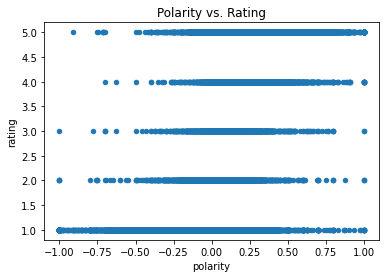

In [ ]:
import matplotlib.pyplot as plot

#plotting each individual review's polarity against its rating
df_sa.plot.scatter(x='polarity', y='rating', title= "Polarity vs. Rating");

plot.show(block=True);

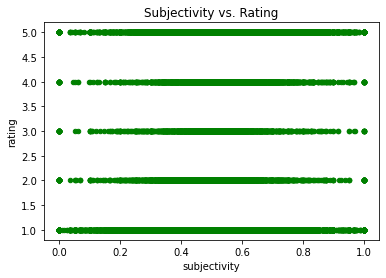

In [ ]:
#each individual review's subjectivity vs. its rating
df_sa.plot.scatter(x='subjectivity', y='rating', c='green', 
                   title= "Subjectivity vs. Rating");

plot.show(block=True);

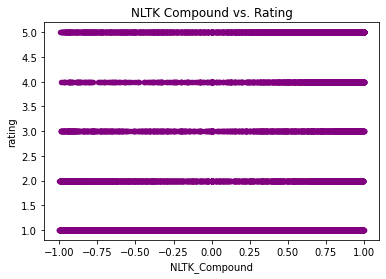

In [ ]:
#each individual review's compound score vs. its rating
df_sa.plot.scatter(x='NLTK_Compound', y='rating', c='purple', 
                   title= 'NLTK Compound vs. Rating');

plot.show(block=True);

In [ ]:
%cd /content/drive/MyDrive/NLP Final Project/
df_sa.to_pickle('SA_individual')
df_sa.to_csv('SA_individual.csv')

/content/drive/MyDrive/NLP Final Project


###by doctor's office

In [ ]:
# Create a dataframe that includes the individual cleaned reviews plus attributes for each doctor's office
df_sa_by_office = df_sa[['doctorID','rounded_rating','expanded']]

df_sa_by_office.head(5)

,doctorID,rounded_rating,expanded
0,0,4.5,After seeing 4.5 stars reviews on a family pra...
1,0,4.5,I just switched this month to Rancho Wellness ...
2,0,4.5,"I love Rancho wellness, they are very organize..."
3,0,4.5,Large waiting room and welcoming staff. Dr. Si...
4,0,4.5,My family and I have been going to Dr. Singh f...


In [ ]:
# use groupby plus a custom aggregate function to merge all review texts
# set as_index=False so that grouping columns are not added to the index.

%time df_sa_by_office = df_sa_by_office.groupby(['doctorID','rounded_rating'], as_index=False)['expanded'].apply (lambda x: ' '.join(x))

df_sa_by_office.head(5)

CPU times: user 148 ms, sys: 5.97 ms, total: 154 ms
Wall time: 164 ms


,doctorID,rounded_rating,expanded
0,0,4.5,After seeing 4.5 stars reviews on a family pra...
1,1,3.0,I have been going here for several years now. ...
2,2,5.0,The baby center at St Bernardines is awesome. ...
3,3,2.5,I feel the need to post a review about Doctor ...
4,4,3.0,Love Dr. Ali! She is very knowledgeable and is...


In [ ]:
len(df_sa_by_office)

2552

In [ ]:
# check the first aggregrated reviews
(df_sa_by_office.loc[0:0,['expanded']]).iloc[0,0]

'After seeing 4.5 stars reviews on a family practice in Rancho, I called an made a same day appointment with them. I was sent to their upland office and was seen by a super nice PA name Heidi. She did very throughout checkups on me and also explained my conditions to me patiently. I was very happy that I found a nice family practice office near home. I just switched this month to Rancho Wellness based on a referral from my sister in law. I had a previous appointment with Planned Parenthood before getting this insurance and when I went to go get my depo shot, they told me I was no longer qualified for the free birth control and that if I still wanted to get it, it would cost me over $100. I decided to call and see if Rancho Wellness could get me in, since I had a dead line to get the shot. They were able to get me in the same day. They were extremely nice and friendly. It took me longer to fill out the paperwork than it did for them to take me back and see the doctor. Love my new doctor

In [ ]:
# same as previous code to add polarity and subjectivity score
df_sa_by_office['polarity'] = df_sa_by_office['expanded'].apply(lambda row: TextBlob (row).sentiment[0])
df_sa_by_office['subjectivity'] = df_sa_by_office['expanded'].apply(lambda row: TextBlob (row).sentiment[1])

In [ ]:
# let's add the compound score 
# we can see that because the texts are much longer now, NLTK compound score does not work well.
%time df_sa_by_office['NLTK_Compound'] = df_sa_by_office['expanded'].apply(lambda x: sia.polarity_scores(x)['compound'])

df_sa_by_office.head(5)

CPU times: user 5min 22s, sys: 3.32 s, total: 5min 25s
Wall time: 5min 26s


,doctorID,rounded_rating,expanded,polarity,subjectivity,NLTK_Compound
0,0,4.5,After seeing 4.5 stars reviews on a family pra...,0.283586,0.536893,1.0000
1,1,3.0,I have been going here for several years now. ...,0.127707,0.476129,0.9998
2,2,5.0,The baby center at St Bernardines is awesome. ...,0.249169,0.515605,1.0000
3,3,2.5,I feel the need to post a review about Doctor ...,0.069367,0.473503,0.9970
4,4,3.0,Love Dr. Ali! She is very knowledgeable and is...,0.188873,0.621907,0.9895


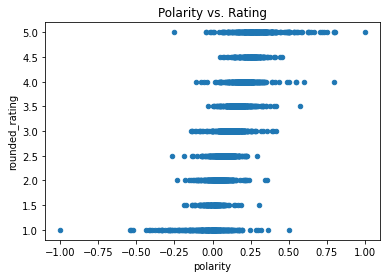

In [ ]:
#each doctor's office's overall review polarity vs. rating
df_sa_by_office.plot.scatter(x='polarity', y='rounded_rating', title= "Polarity vs. Rating");

plot.show(block=True);

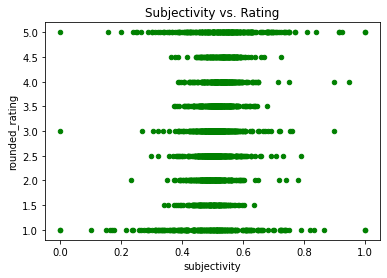

In [ ]:
#each doctor's office's overall review polarity vs. rating
df_sa_by_office.plot.scatter(x='subjectivity', y='rounded_rating', c='green', 
                             title= "Subjectivity vs. Rating");

plot.show(block=True);

In [ ]:
#examining high subjectivity reviews for 5-star and 1-star rated doctors
#leaving aside the outliers, we are examining reviews with a subjectivity of 0.69 - 0.71 

df_sa_by_office.loc[((df_sa_by_office['subjectivity']  > 0.69) & (df_sa_by_office['subjectivity']  < 0.71))
& ((df_sa_by_office['rounded_rating']  == 5.0) | (df_sa_by_office['rounded_rating'] == 1.0))]

,doctorID,rounded_rating,expanded,polarity,subjectivity,NLTK_Compound
88,91,5.0,Dr. Ransom is awesome! I am making appt with h...,0.703125,0.704167,0.9320
165,171,5.0,"They are friendly, fast, and knowledgeable. I ...",0.385417,0.700000,0.8979
519,562,1.0,Dr. Owais A Zaidi is by far the most heartless...,-0.004545,0.703030,-0.6047
781,834,5.0,Tamara has many tools in her delightful room a...,0.486417,0.708778,0.9969
1258,1331,5.0,Nicole was AWESOME!!! I had my session earlier...,0.560417,0.700000,0.9477
1277,1350,5.0,Dr. Le has been my HIV doc for over 3 years no...,0.332143,0.692857,0.9601
1602,1686,5.0,I have been seeing Dr.singhvi now for about 2 ...,0.260000,0.695427,0.9813
1824,1914,5.0,"Pretty funny finding a Dr on yelp , but anythi...",0.195455,0.697727,0.9911
1955,2047,5.0,Update: The gal on the phone had said Dr. Swee...,0.392526,0.692812,0.9962
2042,2139,5.0,I have had two surgeries here and both times t...,0.380556,0.692222,0.9764


In [ ]:
#high subjectivity reviews from a 5-star rated doctor's office

df_sa_by_office['expanded'][781]

'Tamara has many tools in her delightful room and being, and I am particularly fond of her crystal bowls. The only thing missing with this wonderful light worker are her wings. Wait. There they are. Had a beautiful experience. Completely work every minute.Feeling so amazing since then. I will definetly be returning. Come see Tamara in her beautiful room relax and get healed Wonderful! You will love it. She is very gifted Tamara is an Exceptional practitioner and Extraordinary Artist. When you combine the healing arts in a unique environment, you get a therapeutic experience that has to be enjoyed to be believed!!! By merging Massage, Reiki and Sound bath she has come up with the ultimate in relaxation. I highly recommend it! Tamara is the best reiki healer I have ever had and I have had reiki healings for over 20 years. I recommend her highly. THE BEST! Tamara is pure magic.. such a loving soul. The experience of having her healing energy either through her sound baths or one on one Re

In [ ]:
#high subjectivity reviews from a 1-star rated doctor's office

df_sa_by_office['expanded'][519]

"Dr. Owais A Zaidi is by far the most heartless, souless, egotistical ICU doctor I have ever encountered. He will let a patient lay in the bed of the hospital and insist that there is no level of higher care needed, all while the national ranking of San Antonio is one of the worst in the country. San Antonio really needs to be investigated for infection. The city of Upland and all of the Inland Empire deserve better care than they are getting from this outdated hospital. Just Google San Antonio's national ranking and see for yourself. Patient beware! Terrible billing practices! No bill sent after adjustments for insurance asking for payment until a collections letter was received in the mail saying the client has given all the extension of time they feel is justified. The collection company is trying to collect interest on top of the principal when no statements have been received. They just sell the account to a collections agency and move on potentially damaging peoples credit."

In [ ]:
#examining low subjectivity reviews for 5-star and 1-star rated doctors
#leaving aside the outliers, we are examining reviews with a subjectivity of 0.25 - 0.30 

df_sa_by_office.loc[((df_sa_by_office['subjectivity']  > 0.20) & (df_sa_by_office['subjectivity']  < 0.30))
& ((df_sa_by_office['rounded_rating']  == 5.0) | (df_sa_by_office['rounded_rating'] == 1.0))]

,doctorID,rounded_rating,expanded,polarity,subjectivity,NLTK_Compound
373,393,5.0,Very relaxing environment. Came to get a foot ...,0.233333,0.266667,0.7501
390,412,1.0,This Dr.'s Office is so unprofessional! Today ...,0.000000,0.283333,-0.7974
514,556,1.0,Approximately 3 years ago I got a breast lift ...,-0.069048,0.236081,-0.3291
521,564,1.0,I am trying to change doctor's and my new medi...,0.093074,0.257468,0.0000
644,692,1.0,Primecare of Chino Valley manages my grandmoth...,0.019839,0.273744,-0.6204
695,743,1.0,Had to switch Dr.'s after I was assigned him f...,-0.108333,0.238889,-0.7558
1326,1399,5.0,My kids have been seeing Dr. Aljilani for the ...,-0.250000,0.250000,0.0000
1377,1451,5.0,I just recently had a consultation with Dr. Ba...,0.062121,0.251515,0.9377
1403,1478,1.0,Do not go here. I have to go here because my i...,-0.071429,0.214286,0.3182
1409,1484,1.0,My wife has worked in the medical field for ma...,-0.068750,0.289583,-0.9071


In [ ]:
#low subjectivity reviews from a 5-star rated doctor's office

df_sa_by_office['expanded'][2297]

'On-site medical services to the employees and visitors of the Molycorp Minerals mine. Staff is available 24-hours a day (excluding some holidays). Services provided include: first-aid, urine drug screening and testing, breath alcohol testing, respirator mask fit testing and spirometry/pulmonary function testing, audiology exams etc. There is always an ICEMA (San Bernardino County EMS) accredited, California state licensed paramedic on staff to respond to medical emergencies within the complex.'

In [ ]:
#low subjectivity reviews from a 1-star rated doctor's office

df_sa_by_office['expanded'][514]

'Approximately 3 years ago I got a breast lift tummy tuck and fat transfer to the buttocks. I paid $17,000 when the nurse put my girdle on she did not explain anything to me so the girdle left me dog ears on the sides of my hips and Dr.Smiley did not transfer all the fat to my buttocks my left side was a lot smaller than the right side so I went back to Dr.Smiley and he said I would now have to pay $3900 to fix it.So now I am in $20,900 so I went in for the second time I have waited a year and a half and the results are actually worse so now I have to buy long shirts to cover my butt because you can see a really big indentation on my left side of my butt. So I had went in today 3/10/2017 and waited for 4 hrs and when I had called previously they promised me $3900 to fix the problem once and for all but when I went in the price changed to $7200 .I could not believe that Dr.Smiley would even charge me after all this .Then they sent me home after waiting 4 hrs and said someone would call 

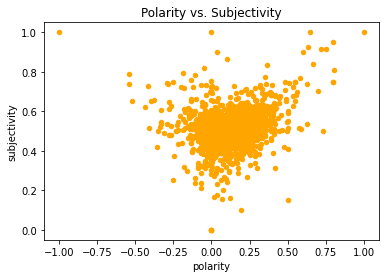

In [ ]:
#is there any relationship between polarity and subjectivity?
df_sa_by_office.plot.scatter(x='polarity', y='subjectivity', c='orange', 
                             title= 'Polarity vs. Subjectivity');

plot.show(block=True);

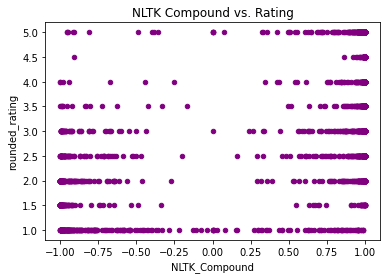

In [ ]:
#each doctor's office's overall review compound score vs. rating
df_sa_by_office.plot.scatter(x='NLTK_Compound', y='rounded_rating', c='purple', 
                   title= 'NLTK Compound vs. Rating');

plot.show(block=True);

In [ ]:
df_sa_by_office.to_pickle('SA_by_business')
df_sa_by_office.to_csv('SA_by_business.csv')

# Task 5

LDA - Siyu

## Data Clean

In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 8.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.3 MB 41.8 MB/s 
     |████████████████████████████████| 15.7 MB 177 kB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=0b454430fd645e703e9499fdc611a51a475839a7cec02c27112c29fa9bb330c0
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take int

In [ ]:
from nltk import FreqDist
import string
import gensim
from gensim.models.phrases import Phrases, Phraser
from gensim import models
from gensim.models import CoherenceModel, LsiModel

import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models

In [ ]:
#df_review_final = pd.read_json('/content/drive/MyDrive/Colab_Notebooks/review_and_final.json')

In [ ]:
%cd /content/drive/MyDrive/NLP Final Project/
df_review_final = pd.read_pickle('prepared_data')

/content/drive/MyDrive/NLP Final Project


In [ ]:
# use FreqDis() to find the frequency disctibution for each token
%time fdist_reviews= FreqDist([token for sublist in df_review_final['final'].values for token in sublist])
print('The total number of tokens:',fdist_reviews.N())
print('The number of unique tokens:', len(fdist_reviews))

CPU times: user 2.52 s, sys: 30.4 ms, total: 2.55 s
Wall time: 2.55 s
The total number of tokens: 2832965
The number of unique tokens: 41542


In [ ]:
fdist_reviews_list = sorted(fdist_reviews.items(), key=lambda x:x[1], reverse= True)

In [ ]:
token_list = [token[0] for token in fdist_reviews_list]

In [ ]:
# let's see if any tokens are not characters 
none_char_token = [token for token in token_list if all(j.isdigit() or j in string.punctuation for j in token)]

print(len(none_char_token))
# we can see many of these tokens are either count number, or time or date. An NER tagger would have captured that.
# You can explore these entity types in your final project, and to see if you can these to improve your feature engineering. 
print(*none_char_token)

839
... !!! .... !!!! ..... !!!!! ??? ...... !!!!!! ???? *** !!!!!!! ?!?! ....... ?!? !). "... --- ..." :-) !!!!!!!! )... **** ?". !), !.. ?!! !?! ????? .). ?). !!!!!!!!! ".. $$$ ??!! ........ ...." !... ?!!! ".... (?) .!! !". !!!!!!!!!! ?!" ...( ?", ***** ......... ??! .!!! ...) !!" ?... ).... .." !!!) !!) ,,, ??" :). .". .......... !!. +++ .*** ?????? ?!?!?! ?!?!? !!!" $$$. !?!? $$. !!!!!!!!!!! ).. ****** ??!!! "). "..... ..( !!.. :// .** ??) ..!! !!). ?!) "!!! ??????? ;-) !!!!!!!!!!!!!! ..., ...? ___ ,,,, !!!!!!!!!!!!! !!?? ,... ---- !!!. ........... "!! .., )!! "), $$$$ !?? !!!!!!!!!!!!!!! !!!!!!!!!!!! ???" )!!! ?), )." !.... ???!!! !?" ............. !!? ,.. ???!! ?.... '... ???????? !** !!!' )-- ----- '.. ...: ?!). !??? !!, ?!!!!! ?!?" ,..... ???) !", ...!!! ?!?? !!!??? ."... ....) ?!!!! !*** ."( ____ !!!... :)! ???! :(. ............ ?.. .....( :-( ...). ?!.. !?!?! ??!!!! !!!!!!!!!!!!!!!!!! ...". !!!!!!!!!!!!!!!!!!! ..! !!!!" :-/ )..... "!!!! .--- .-- +-- ??... ............... .--

In [ ]:
cleaned_token_list = []
for token_list in df_review_final['final']:
    tmp_list = []
    for token in token_list:
        if token not in none_char_token:
            tmp_list.append(token)
    cleaned_token_list.append(tmp_list)

In [ ]:
# after removing digits and punctuations, get the empty list
for i, token_list in enumerate(cleaned_token_list):
  if len(token_list) == 0:
    print(i)

1536
11970


In [ ]:
# remove empty list from df
df_review_final = df_review_final.drop([1536, 11970], axis=0)
df_review_final = df_review_final.reset_index().drop(['index'], axis=1)

In [ ]:
weird_list = []
cleaned_list = []
for i, token_list in enumerate(df_review_final['final']):
  tmp_list = []
  for word in token_list:
    if '�' in word:
      weird_list.append(word)
    else:
      tmp_list.append(word)
  cleaned_list.append(tmp_list)

In [ ]:
df_review_final['CleanedFinal'] = cleaned_list

In [ ]:
df_review_final

,Unnamed: 0,doctorID,username,rating,date_of_review,review_content,rounded_rating,expanded,tokens,tags,lemmas,final,CleanedFinal
0,0,0,Whitney W.,5,5/27/2021,After seeing 4.5 stars reviews on a family pra...,4.5,After seeing 4.5 stars reviews on a family pra...,"[After, seeing, 4, ., 5, stars, reviews, on, a...","[(After, IN), (seeing, VBG), (4, CD), (., .), ...","[After, see, 4, ., 5, star, review, on, a, fam...","[see, star, review, family, practice, rancho, ...","[see, star, review, family, practice, rancho, ..."
1,1,0,Kristin R.,5,9/30/2015,I just switched this month to Rancho Wellness ...,4.5,I just switched this month to Rancho Wellness ...,"[I, just, switched, this, month, to, Rancho, W...","[(I, PRP), (just, RB), (switched, VBD), (this,...","[I, just, switch, this, month, to, Rancho, Wel...","[switch, month, rancho, wellness, base, referr...","[switch, month, rancho, wellness, base, referr..."
2,2,0,Allyson F.,5,2/24/2017,"I love Rancho wellness, they are very organiz...",4.5,"I love Rancho wellness, they are very organize...","[I, love, Rancho, wellness, ,, they, are, very...","[(I, PRP), (love, VBP), (Rancho, NNP), (wellne...","[I, love, Rancho, wellness, ,, they, be, very,...","[love, rancho, wellness, organize, professiona...","[love, rancho, wellness, organize, professiona..."
3,3,0,Brian J.,5,10/12/2016,Large waiting room and welcoming staff. Dr. S...,4.5,Large waiting room and welcoming staff. Dr. Si...,"[Large, waiting, room, and, welcoming, staff, ...","[(Large, JJ), (waiting, VBG), (room, NN), (and...","[Large, wait, room, and, welcoming, staff, ., ...","[large, wait, room, welcoming, staff, singh, p...","[large, wait, room, welcoming, staff, singh, p..."
4,4,0,Stephani P.,5,6/2/2015,My family and I have been going to Dr. Singh f...,4.5,My family and I have been going to Dr. Singh f...,"[My, family, and, I, have, been, going, to, Dr...","[(My, PRP$), (family, NN), (and, CC), (I, PRP)...","[My, family, and, I, have, be, go, to, Dr, ., ...","[family, singh, year, actually, follow, anothe...","[family, singh, year, actually, follow, anothe..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52684,52686,2606,NaN,1,10/21/2015,I live in LA but was on a trip in Palm Springs...,1.5,I live in LA but was on a trip in Palm Springs...,"[I, live, in, LA, but, was, on, a, trip, in, P...","[(I, PRP), (live, VBP), (in, IN), (LA, NNP), (...","[I, live, in, LA, but, be, on, a, trip, in, Pa...","[live, trip, palm, springs, urgent, care, cold...","[live, trip, palm, springs, urgent, care, cold..."
52685,52687,2606,NaN,1,9/9/2015,These people are crooks!!!So to get started th...,1.5,These people are crooks!!!So to get started th...,"[These, people, are, crooks, !!!, So, to, get,...","[(These, DT), (people, NNS), (are, VBP), (croo...","[These, people, be, crooks, !!!, So, to, get, ...","[people, crooks, !!!, get, start, charge, copa...","[people, crooks, !!!, get, start, charge, copa..."
52686,52688,2606,NaN,1,11/13/2014,"Sadly, I think the previous comments and revie...",1.5,"Sadly, I think the previous comments and revie...","[Sadly, ,, I, think, the, previous, comments, ...","[(Sadly, RB), (,, ,), (I, PRP), (think, VBP), ...","[Sadly, ,, I, think, the, previous, comment, a...","[sadly, think, previous, comment, review, true...","[sadly, think, previous, comment, review, true..."
52687,52689,2606,NaN,1,7/23/2014,I've been waiting for just over an hour now an...,1.5,I have been waiting for just over an hour now ...,"[I, have, been, waiting, for, just, over, an, ...","[(I, PRP), (have, VBP), (been, VBN), (waiting,...","[I, have, be, wait, for, just, over, an, hour,...","[wait, hour, call, back, two, people, since, f...","[wait, hour, call, back, two, people, since, f..."


## Bigrams and id2word

In [ ]:
sent = df_review_final['CleanedFinal'] # Cleaned Tokens is already a list of list of words

# train a bigram model from the stream of sentences. We set min_count as 25 here. 
bigram = Phrases(sent, min_count=25)

# export the trained bigram model
# Use this instead of Phrases because we do not need to update the bigram statistics any more.
bigram_phraser = Phraser(bigram) 

In [ ]:
texts = bigram_phraser[sent]

In [ ]:
# let's first created a list of bigram phrases
bigrams = []
for text in texts:
  for word in text: 
    if '_' in word:
      bigrams.append(word)

bigrams [:5] # see five bigrams

['super_nice',
 'rancho_wellness',
 'sister_law',
 'planned_parenthood',
 'birth_control']

In [ ]:
id2word = gensim.corpora.Dictionary(texts)

In [ ]:
# filter very frequent and rare tokens 
# filter out tokens that appear in less than 50 documents (0.1% of our corpus documents), more than 0.5 documents (total corpus size, not absolute)
id2word.filter_extremes(no_below=50, no_above=0.5) 

# create a corpus, which here is the BOW bigram model, same as the doc_term_frequency we discussed early  
corpus = [id2word.doc2bow(doc) for doc in texts]

# corpus as list of list with tuples of (token_id, frequency) example
print(*corpus[0])

(0, 1) (1, 1) (2, 1) (3, 1) (4, 1) (5, 1) (6, 1) (7, 2) (8, 1) (9, 1) (10, 1) (11, 1) (12, 1) (13, 1) (14, 1) (15, 2) (16, 1) (17, 2) (18, 1) (19, 1) (20, 2) (21, 1) (22, 1) (23, 1) (24, 1) (25, 1)


In [ ]:
import pickle
pickle.dump(corpus, open('corpus.pkl','wb'))
pickle.dump(id2word, open('id2word.pkl','wb'))

## LSA Model

### BOW

In [ ]:
def create_gensim_lsa_BOW (corpus, id2word, n_topics, n_words):
  """
  Input:  corpus: doc_term_matrix
          is2word: dictionary 
          number of topics, and number of words associated with each topic
  output: return LSA model
  """
  lsa_model = models.LsiModel(corpus,
                            id2word=id2word,
                            num_topics=n_topics)
  
  for index, value in lsa_model.print_topics(num_topics=n_topics, num_words=n_words):
    print('Topic ', index, ':', value)
  
  return lsa_model

In [ ]:
def compute_coherence_scores_bow (id2word, corpus_bow, texts, stop, start, step):
  """
  Input:  id2word: a dictionary that maps token ID to tokens
          corpus_bow: output from bowModel 
          texts: a list of list strings, tokenized texts
          stop: Max number of topics 
          start: Min number of topics
          step: number of topics to increment 
  Output: model_list: a list of LSA topic models 
          coherence_score: a list of coherence scores for each topic model
  """
  coherence_score = []
  model_list = []

  for n_topics in range (start, stop, step):
    lsa_model = models.LsiModel(corpus_bow, # we will use bow
                                id2word=id2word,
                                num_topics=n_topics)
    
    model_list.append(lsa_model)
    
    coherence_model_lsa = CoherenceModel(model=lsa_model, texts=texts, dictionary=id2word, coherence='c_v')
    
    coherence_score.append(coherence_model_lsa.get_coherence())
  
  return model_list, coherence_score

In [ ]:
%time lsa_models = compute_coherence_scores_bow(id2word, corpus, texts, 16, start=2, step=2)

CPU times: user 3min 50s, sys: 10.8 s, total: 4min 1s
Wall time: 3min 41s


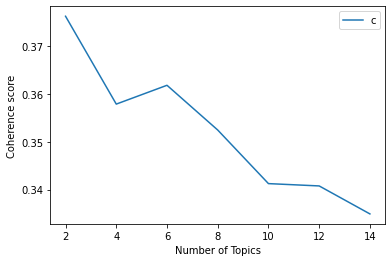

In [ ]:
x = range(2, 16, 2)
plt.plot(x, lsa_models[1])
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
lsa_models[0][2]

In [ ]:
n_words = 10

topic_words_6 = pd.DataFrame({})

for i, topic in enumerate(lsa_models[0][2].get_topics()): # the term topic matrix with shape (num_topics, vocabulary_size)
    top_feature_ids = topic.argsort()[-n_words:][::-1]
    feature_values = topic[top_feature_ids]
    words = [id2word[id] for id in top_feature_ids]
    labels= [('Topic'+str(i)+' word'), ('Topic'+str(i)+' value') ]
    topic_df = pd.DataFrame(zip(words, feature_values), columns=labels)
    topic_words_6 = pd.concat([topic_words_6, topic_df], axis=1)

topic_words_6

,Topic0 word,Topic0 value,Topic1 word,Topic1 value,Topic2 word,Topic2 value,Topic3 word,Topic3 value,Topic4 word,Topic4 value,Topic5 word,Topic5 value
0,get,0.292389,doctor,0.407971,nurse,0.338769,doctor,0.647560,office,0.379533,say,0.271196
1,doctor,0.262781,staff,0.284596,hospital,0.271457,say,0.252345,staff,0.260486,would,0.262496
2,time,0.219896,care,0.229561,come,0.141630,tell,0.164889,care,0.218053,tell,0.174627
3,say,0.216918,time,0.188349,room,0.129623,would,0.083801,call,0.172467,wait,0.170054
4,call,0.216729,patient,0.184341,care,0.124251,ask,0.061121,would,0.154238,patient,0.157997
5,tell,0.206495,office,0.159319,take,0.121552,pain,0.057178,patient,0.096905,ask,0.135594
6,would,0.202713,great,0.132457,get,0.096694,nurse,0.055175,great,0.091816,office,0.090826
7,see,0.180035,always,0.108132,pain,0.095865,give,0.051252,surgery,0.089035,come,0.077313
8,take,0.164390,see,0.106668,one,0.088991,hospital,0.049982,always,0.068582,see,0.064095
9,office,0.163494,good,0.071375,help,0.084270,know,0.049214,need,0.065417,hour,0.059098


### TF-IDF

In [ ]:
# vectorize the corpus using tfidf
tfidf = models.TfidfModel(corpus)

%time corpus_tfidf = tfidf[corpus]

CPU times: user 312 µs, sys: 4 µs, total: 316 µs
Wall time: 321 µs


In [ ]:
def compute_coherence_scores_tfidf(id2word, corpus_tfidf, texts, stop, start, step):
  """
  Input:  id2word: a dictionary that maps token ID to tokens
          corpus_bow: output from bowModel 
          texts: a list of list strings, tokenized texts
          stop: Max number of topics 
          start: Min number of topics
          step: number of topics to increment 
  Output: model_list: a list of LSA topic models 
          coherence_score: a list of coherence scores for each topic model
  """
  coherence_score = []
  model_list = []

  for n_topics in range (start, stop, step):
    lsa_model = models.LsiModel(corpus_tfidf, # we will use bow
                                id2word=id2word,
                                num_topics=n_topics)
    
    model_list.append(lsa_model)
    
    coherence_model_lsa = CoherenceModel(model=lsa_model, texts=texts, dictionary=id2word, coherence='c_v')
    
    coherence_score.append(coherence_model_lsa.get_coherence())
  
  return model_list, coherence_score

In [ ]:
%time lsa_models_tfidf = compute_coherence_scores_tfidf(id2word, corpus_tfidf, texts, 16, start=2, step=2)

CPU times: user 4min 58s, sys: 12.1 s, total: 5min 10s
Wall time: 4min 50s


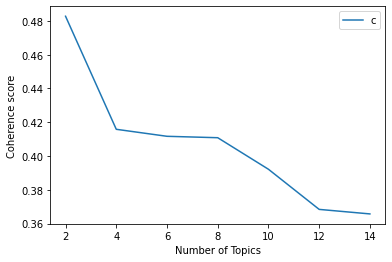

In [ ]:
x = range(2, 16, 2)
plt.plot(x, lsa_models_tfidf[1])
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
n_words = 10

topic_words_8_tfidf = pd.DataFrame({})

for i, topic in enumerate(lsa_models_tfidf[0][3].get_topics()): # the term topic matrix with shape (num_topics, vocabulary_size)
    top_feature_ids = topic.argsort()[-n_words:][::-1]
    feature_values = topic[top_feature_ids]
    words = [id2word[id] for id in top_feature_ids]
    labels= [('Topic'+str(i)+' word'), ('Topic'+str(i)+' value') ]
    topic_df = pd.DataFrame(zip(words, feature_values), columns=labels)
    topic_words_8_tfidf = pd.concat([topic_words_8_tfidf, topic_df], axis=1)

topic_words_8_tfidf

,Topic0 word,Topic0 value,Topic1 word,Topic1 value,Topic2 word,Topic2 value,Topic3 word,Topic3 value,Topic4 word,Topic4 value,Topic5 word,Topic5 value,Topic6 word,Topic6 value,Topic7 word,Topic7 value
0,doctor,0.158818,great,0.281958,hospital,0.205657,office,0.365569,surgery,0.483165,love,0.326254,always,0.218943,hospital,0.447596
1,wait,0.149808,always,0.202560,surgery,0.167264,call,0.282260,procedure,0.239521,son,0.230772,love,0.212772,nurse,0.267653
2,office,0.143670,friendly,0.202515,pain,0.131978,appointment,0.208772,eye,0.165232,kid,0.159820,best,0.191703,call,0.204052
3,call,0.138821,staff,0.194903,nurse,0.108746,phone,0.104886,appointment,0.119483,...,0.148563,year,0.178544,office,0.193070
4,time,0.137892,love,0.170145,say,0.106122,always,0.087628,wait,0.117094,baby,0.138856,see,0.134608,son,0.160372
5,get,0.137670,professional,0.162526,help,0.085892,insurance,0.085572,comfortable,0.114655,daughter,0.136067,wait,0.128091,appointment,0.147825
6,appointment,0.134980,best,0.160032,care,0.081452,referral,0.075758,great,0.106323,nice,0.134929,appointment,0.126944,daughter,0.113326
7,see,0.127340,care,0.149467,tell,0.080436,schedule,0.075633,lasik,0.103137,call,0.119063,surgery,0.121787,baby,0.103845
8,staff,0.119932,highly_recommend,0.145887,could,0.076066,year,0.071033,pain,0.102732,nurse,0.115981,son,0.121364,child,0.093368
9,say,0.117625,thank,0.131170,want,0.071561,week,0.068266,consultation,0.097057,say,0.110540,doctor,0.110951,day,0.090951


## LDA

In [ ]:
def compute_lda_coherence_scores (id2word, texts, corpus, stop, start, step):
  
  """
  Input:  id2word: a dictionary that maps token ID to tokens
          texts: a list of list strings
          corpus: Gensim corpus which is a BOW model with bigrams
          stop: Max number of topics 
          start: Min number of topics
          step: number of topics to increment 
  Output: model_list: a list of LDA topic models 
          coherence_score: a list of coherence scores for each topic model
  """
  coherence_score = []
  model_list = []

  for n_topics in range (start, stop, step):
    chunksize = 5000
    passes = 10
    iterations = 400 # we increase its iterations
    eval_every = None  # 
    
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=n_topics, 
                                            random_state=100,
                                            chunksize=chunksize,
                                            passes=passes,
                                            alpha='auto',
                                            eta ='auto',
                                            iterations = iterations,
                                            gamma_threshold=0.001,
                                            per_word_topics=True,
                                            eval_every = eval_every)
    
    model_list.append(lda_model)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
    
    coherence_score.append(coherence_model_lda.get_coherence())
  
  return model_list, coherence_score

In [ ]:
chunksize = 5000
passes = 10
iterations = 400 # we increase its iterations
eval_every = None  # 

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                        id2word=id2word,
                                        num_topics=6, 
                                        random_state=100,
                                        chunksize=chunksize,
                                        passes=passes,
                                        alpha='auto',
                                        eta ='auto',
                                        iterations = iterations,
                                        gamma_threshold=0.001,
                                        per_word_topics=True,
                                        eval_every = eval_every)

NameError: ignored

In [ ]:
# default print topic
# we can see the topic is much easier to interpret, partly because of LAD algroithm, partly because we filtered extreme words
for index, value in lda_model.print_topics():
  print('Topic ', index, ':', value)

In [ ]:
%time lda_models = compute_lda_coherence_scores(id2word, texts, corpus, 16, 4, 2)

In [ ]:
x = range(4, 16, 2)
plt.plot(x, lda_models[1])
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
lda_models[0][5].save('/content/drive/MyDrive/Colab_Notebooks/lda_model_14.p')

In [ ]:
lda_model_14 = gensim.models.ldamodel.LdaModel.load('/content/drive/MyDrive/Colab_Notebooks/lda_model_14.p')

In [ ]:
import IPython
IPython.display.HTML(filename= '/content/drive/MyDrive/Colab_Notebooks/lda_model_14_vis.html')

In [ ]:
'''
  topic 0: people are the major topics. The overall review is positive. Describe staff. 
  topic 1: A topic containing negative reviews. Insufficient nouns to describe the major topic.
  topic 2: A topic focusing on making appointment. Describe the approach to make appointment.
  topic 3: Still focus on making appointment. Describe experience of making appointment.
  topic 4: Describe experience of meeting with doctor.
  topic 5: Describe experience of getting treatment in medical center. No people showing up in this topic.
  topic 6: A topic describing experience of patients' relatives. 
  topic 7: skin and vision are words related to medical field. Review tends to be positive.
  topic 8: Insurance.
  topic 9: reviewers related to this topic may have fever and inflammmation.
  topic 10: reviewers related to this topic may have physical injury.
  topic 11: Describe experience of getting treatment in center, and patients might be in emergency.
  topic 12: this topic focuses on children.
  topic 13: A topic related to surgery. 
'''

In [ ]:
chunksize = 5000
passes = 10
iterations = 400 # we increase its iterations
eval_every = None  # 

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                        id2word=id2word,
                                        num_topics=14, 
                                        random_state=100,
                                        chunksize=chunksize,
                                        passes=passes,
                                        alpha='auto',
                                        eta ='auto',
                                        iterations = iterations,
                                        gamma_threshold=0.001,
                                        per_word_topics=True,
                                        eval_every = eval_every)

In [ ]:
topic_range = list(range(0,15))
topic_prob = []
full_topics = []
for i, row in enumerate(lda_model[corpus]):
  row = row[0]
  topics = []
  probs = []
  topics_prob = []
  for topic in row:
    topics.append(topic[0])
    probs.append(topic[1])
  topic_index = 0 
  for topic_num in topic_range:
    if topic_num in topics:
      topics_prob.append(probs[topic_index])
      topic_index += 1
    else:
      topics_prob.append(0.00)
  full_topics.append(topics_prob)
      


In [ ]:
full_topics

In [ ]:
topic_labels = ['Topic_' + str(i) for i in range (0, 15)]
topic_df = pd.DataFrame(full_topics, index=df_review_final.index.tolist(), columns=topic_labels)
topic_df = topic_df.reset_index()
topic_df.rename(columns={'index':'Index'}, inplace=True)
topic_df.head(5)

In [ ]:
df_glove_attributes = pd.merge(left = df_w_glove, right = topic_df, left_on='Index', right_on='Index')
df_glove_attributes_agg = df_glove_attributes.groupby([	'doctorID',	]).agg({'rating':'mean', 'Length' : 'mean', 'Lexical Diversity':'mean'}).reset_index()

In [ ]:
df_glove_attributes.to_pickle('df_w_attributes')

In [ ]:
for label in topic_labels:
  df_glove_attributes_agg[label] = agg_cols(df_glove_attributes,label)

In [ ]:
df_attributes_agg = pd.merge(left = df_glove_attributes_agg, right = df_sa_agg, left_on = "doctorID", right_on = "doctorID")

In [ ]:
df_ner_spacy = pd.read_pickle('df_ner_spacy.pkl')

In [ ]:
df_ner_agg = df_ner_spacy.groupby('doctorID').agg({'ORG':'mean', 'GPE' :'mean', 'PERSON':'mean', 'MONEY':'mean'}).reset_index()

In [ ]:
df_attributes_agg = pd.merge(left = df_attributes_agg, right = df_ner_agg, left_on = "doctorID", right_on = "doctorID")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/NLP Final Project/
df_attributes_agg.to_pickle('df_w_attributes_agg')
df_attributes_agg.head(3)

# Task 6

Supervised Learning - Sean

Emperical models:
* word embeddings
* word embeddings SVD
* NER tags, length, lexical diversity, sentiment, group probabilities?


In [ ]:
# 4/1AX4XfWiwqqnbmlSsHv7Hg9CDf-amMUeZpLPFuDlcly2fTlHaBROfrOkcgpI
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/NLP Final Project/
import pandas as pd
df_glove_agg = pd.read_csv('df_glove_agg.csv')

/content/drive/MyDrive/NLP Final Project


In [ ]:
df_w_glove_agg

,Unnamed: 0,doctorID,rating,AWE2,AWE3,AWE4,AWE5,AWE6,AWE7,AWE8,AWE9,AWE10,AWE11,AWE12,AWE13,AWE14,AWE15,AWE16,AWE17,AWE18,AWE19,AWE20,AWE21,AWE22,AWE23,AWE24,AWE25,AWE26,AWE27,AWE28,AWE29,AWE30,AWE31,AWE32,AWE33,AWE34,AWE35,AWE36,AWE37,AWE38,...,AWE162,AWE163,AWE164,AWE165,AWE166,AWE167,AWE168,AWE169,AWE170,AWE171,AWE172,AWE173,AWE174,AWE175,AWE176,AWE177,AWE178,AWE179,AWE180,AWE181,AWE182,AWE183,AWE184,AWE185,AWE186,AWE187,AWE188,AWE189,AWE190,AWE191,AWE192,AWE193,AWE194,AWE195,AWE196,AWE197,AWE198,AWE199,AWE200,AWE1
0,0,0,4.450617,0.109580,-0.055467,0.032624,0.037863,0.068353,0.612281,0.007825,-0.014816,-0.041297,-0.101164,-0.085488,-0.601401,-0.117590,0.053162,0.003640,-0.067281,0.082147,-0.030303,-0.107096,0.044002,0.049359,-0.116865,0.018457,-0.112021,0.879065,0.039489,0.179910,0.006141,-0.072227,0.076318,-0.186713,-0.030613,0.016760,-0.072900,0.061665,0.051384,0.016398,...,-0.063129,-0.071170,0.031078,0.008759,-0.084882,-0.113550,0.069989,0.046964,-0.036594,0.045713,-0.038768,0.079776,-0.029784,-0.094229,-0.133694,-0.020224,-0.172105,0.097750,-0.083468,0.055543,0.024740,0.052234,-0.016325,0.072179,0.100411,0.040954,-0.030364,0.049886,0.094056,-0.054656,0.015817,0.100769,-0.119765,0.007846,-0.067108,0.077146,0.048946,0.017984,-0.055928,-0.004739
1,1,1,2.810811,0.090133,-0.060930,0.026661,0.045295,0.027326,0.603496,-0.001355,0.009490,-0.014742,-0.067378,-0.084041,-0.580594,-0.093487,0.070746,-0.043194,-0.051184,0.096345,-0.026170,-0.138979,0.037236,0.048987,-0.073811,-0.022814,-0.104906,0.885185,0.089641,0.171312,0.001509,-0.073263,0.063365,-0.157461,-0.018407,0.014403,-0.072707,0.078101,0.015396,0.041139,...,-0.044536,-0.074104,0.011204,0.055701,-0.092004,-0.145391,0.040438,0.061408,-0.012917,0.034453,-0.046430,0.042516,-0.029370,-0.103526,-0.126716,-0.010893,-0.185730,0.065239,-0.097023,0.022581,0.024610,0.004455,-0.025163,0.052349,0.119964,0.056785,0.004207,0.060572,0.080504,-0.033145,0.028659,0.078784,-0.104174,0.013709,-0.071503,0.064676,0.080182,0.002908,-0.058888,0.017838
2,2,2,4.904762,0.057492,-0.032071,0.002374,-0.020498,0.049577,0.595520,-0.003841,0.010198,-0.019621,-0.100948,-0.005968,-0.577615,-0.062437,-0.002557,0.098014,-0.010020,0.054560,-0.052749,-0.064203,0.037048,0.028531,-0.062374,0.081435,-0.109872,0.939803,0.014482,0.209217,0.079155,-0.053990,0.061940,-0.113278,-0.063614,0.041954,-0.102660,0.031450,0.066701,0.024994,...,-0.064600,-0.051389,0.064819,0.023759,-0.112784,-0.042657,0.032377,0.002203,0.029569,0.152568,0.015837,0.012060,-0.097442,-0.116197,-0.121550,-0.015339,-0.175676,0.036518,-0.135913,0.009221,0.021252,-0.038877,-0.019115,0.111799,-0.028155,0.045435,0.063098,0.003909,0.066870,-0.106063,0.050678,0.084019,-0.105642,0.045542,-0.073244,0.129461,0.045889,0.025196,-0.079230,-0.025036
3,3,3,2.416667,0.105665,-0.064177,0.024043,0.050930,0.014426,0.615250,-0.002282,0.020949,-0.056484,0.002560,-0.049697,-0.619148,-0.102900,0.090590,-0.014152,-0.010258,0.075215,-0.044463,-0.141619,0.025299,0.041922,-0.042957,-0.008504,-0.136420,0.915835,0.063691,0.184653,-0.032327,-0.092390,0.063586,-0.156963,-0.029596,-0.011433,-0.048102,0.042451,-0.005934,0.045870,...,-0.084272,-0.054205,0.028498,0.074691,-0.043320,-0.088574,0.034603,0.029922,-0.081509,0.042854,0.011205,0.029060,-0.063012,-0.101559,-0.107197,-0.023220,-0.147769,0.075356,-0.094736,0.024044,0.039865,0.064397,-0.008018,0.072907,0.087641,0.072423,-0.020360,0.055657,0.109679,-0.057609,0.006164,0.044117,-0.111159,0.013871,-0.073210,0.050130,0.073727,0.001317,-0.046022,0.038018
4,4,4,3.000000,0.082836,-0.142219,0.091863,0.008776,0.022993,0.496680,0.012337,-0.051832,-0.047512,-0.153940,-0.058628,-0.631568,-0.112419,0.047878,-0.067804,-0.005677,0.102753,-0.063472,-0.039263,-0.019887,0.001246,-0.096702,-0.053903,-0.121419,0.699968,0.095285,0.201253,0.020723,-0.041219,0.081264,-0.047501,-0.117670,0.023999,-0.120962,0.101529,0.109891,0.076047,...,-0.001705,-0.040244,0.052940,0.053133,-0.053241,-0.086791,0.024374,-0.005235,-0.038448,0.073409,-0.001047,-0.01931

In [ ]:
df_glove_agg

,doctorID,rating,AWE1,AWE2,AWE3,AWE4,AWE5,AWE6,AWE7,AWE8,AWE9,AWE10,AWE11,AWE12,AWE13,AWE14,AWE15,AWE16,AWE17,AWE18,AWE19,AWE20,AWE21,AWE22,AWE23,AWE24,AWE25,AWE26,AWE27,AWE28,AWE29,AWE30,AWE31,AWE32,AWE33,AWE34,AWE35,AWE36,AWE37,AWE38,...,AWE163,AWE164,AWE165,AWE166,AWE167,AWE168,AWE169,AWE170,AWE171,AWE172,AWE173,AWE174,AWE175,AWE176,AWE177,AWE178,AWE179,AWE180,AWE181,AWE182,AWE183,AWE184,AWE185,AWE186,AWE187,AWE188,AWE189,AWE190,AWE191,AWE192,AWE193,AWE194,AWE195,AWE196,AWE197,AWE198,AWE199,AWE200,Length,Lexical Diversity
0,0,4.450617,-0.004739,0.109580,-0.055467,0.032624,0.037863,0.068353,0.612281,0.007825,-0.014816,-0.041297,-0.101164,-0.085488,-0.601401,-0.117590,0.053162,0.003640,-0.067281,0.082147,-0.030303,-0.107096,0.044002,0.049359,-0.116865,0.018457,-0.112021,0.879065,0.039489,0.179910,0.006141,-0.072227,0.076318,-0.186713,-0.030613,0.016760,-0.072900,0.061665,0.051384,0.016398,...,-0.071170,0.031078,0.008759,-0.084882,-0.113550,0.069989,0.046964,-0.036594,0.045713,-0.038768,0.079776,-0.029784,-0.094229,-0.133694,-0.020224,-0.172105,0.097750,-0.083468,0.055543,0.024740,0.052234,-0.016325,0.072179,0.100411,0.040954,-0.030364,0.049886,0.094056,-0.054656,0.015817,0.100769,-0.119765,0.007846,-0.067108,0.077146,0.048946,0.017984,-0.055928,43.753086,1.105869
1,1,2.810811,0.017838,0.090133,-0.060930,0.026661,0.045295,0.027326,0.603496,-0.001355,0.009490,-0.014742,-0.067378,-0.084041,-0.580594,-0.093487,0.070746,-0.043194,-0.051184,0.096345,-0.026170,-0.138979,0.037236,0.048987,-0.073811,-0.022814,-0.104906,0.885185,0.089641,0.171312,0.001509,-0.073263,0.063365,-0.157461,-0.018407,0.014403,-0.072707,0.078101,0.015396,0.041139,...,-0.074104,0.011204,0.055701,-0.092004,-0.145391,0.040438,0.061408,-0.012917,0.034453,-0.046430,0.042516,-0.029370,-0.103526,-0.126716,-0.010893,-0.185730,0.065239,-0.097023,0.022581,0.024610,0.004455,-0.025163,0.052349,0.119964,0.056785,0.004207,0.060572,0.080504,-0.033145,0.028659,0.078784,-0.104174,0.013709,-0.071503,0.064676,0.080182,0.002908,-0.058888,48.432432,1.105801
2,2,4.904762,-0.025036,0.057492,-0.032071,0.002374,-0.020498,0.049577,0.595520,-0.003841,0.010198,-0.019621,-0.100948,-0.005968,-0.577615,-0.062437,-0.002557,0.098014,-0.010020,0.054560,-0.052749,-0.064203,0.037048,0.028531,-0.062374,0.081435,-0.109872,0.939803,0.014482,0.209217,0.079155,-0.053990,0.061940,-0.113278,-0.063614,0.041954,-0.102660,0.031450,0.066701,0.024994,...,-0.051389,0.064819,0.023759,-0.112784,-0.042657,0.032377,0.002203,0.029569,0.152568,0.015837,0.012060,-0.097442,-0.116197,-0.121550,-0.015339,-0.175676,0.036518,-0.135913,0.009221,0.021252,-0.038877,-0.019115,0.111799,-0.028155,0.045435,0.063098,0.003909,0.066870,-0.106063,0.050678,0.084019,-0.105642,0.045542,-0.073244,0.129461,0.045889,0.025196,-0.079230,77.571429,1.171556
3,3,2.416667,0.038018,0.105665,-0.064177,0.024043,0.050930,0.014426,0.615250,-0.002282,0.020949,-0.056484,0.002560,-0.049697,-0.619148,-0.102900,0.090590,-0.014152,-0.010258,0.075215,-0.044463,-0.141619,0.025299,0.041922,-0.042957,-0.008504,-0.136420,0.915835,0.063691,0.184653,-0.032327,-0.092390,0.063586,-0.156963,-0.029596,-0.011433,-0.048102,0.042451,-0.005934,0.045870,...,-0.054205,0.028498,0.074691,-0.043320,-0.088574,0.034603,0.029922,-0.081509,0.042854,0.011205,0.029060,-0.063012,-0.101559,-0.107197,-0.023220,-0.147769,0.075356,-0.094736,0.024044,0.039865,0.064397,-0.008018,0.072907,0.087641,0.072423,-0.020360,0.055657,0.109679,-0.057609,0.006164,0.044117,-0.111159,0.013871,-0.073210,0.050130,0.073727,0.001317,-0.046022,52.833333,1.160025
4,4,3.000000,0.059764,0.082836,-0.142219,0.091863,0.008776,0.022993,0.496680,0.012337,-0.051832,-0.047512,-0.153940,-0.058628,-0.631568,-0.112419,0.047878,-0.067804,-0.005677,0.102753,-0.063472,-0.039263,-0.019887,0.001246,-0.096702,-0.053903,-0.121419,0.699968,0.095285,0.201253,0.020723,-0.041219,0.081264,-0.047501,-0.117670,0.023999,-0.120962,0.101529,0.109891,0.076047,...,-0.040244,0.052940,0.053133,-0.053241,-0.086791,0.024374,-0.005235,-0.03

In [ ]:
df_glove_agg = df_glove_agg.assign(Recommend = [1 if x >= 4 else 0 for x in df_glove_agg['rating'] ])

In [ ]:
df_glove_agg

,doctorID,rating,AWE1,AWE2,AWE3,AWE4,AWE5,AWE6,AWE7,AWE8,AWE9,AWE10,AWE11,AWE12,AWE13,AWE14,AWE15,AWE16,AWE17,AWE18,AWE19,AWE20,AWE21,AWE22,AWE23,AWE24,AWE25,AWE26,AWE27,AWE28,AWE29,AWE30,AWE31,AWE32,AWE33,AWE34,AWE35,AWE36,AWE37,AWE38,...,AWE164,AWE165,AWE166,AWE167,AWE168,AWE169,AWE170,AWE171,AWE172,AWE173,AWE174,AWE175,AWE176,AWE177,AWE178,AWE179,AWE180,AWE181,AWE182,AWE183,AWE184,AWE185,AWE186,AWE187,AWE188,AWE189,AWE190,AWE191,AWE192,AWE193,AWE194,AWE195,AWE196,AWE197,AWE198,AWE199,AWE200,Length,Lexical Diversity,Recommend
0,0,4.450617,-0.004739,0.109580,-0.055467,0.032624,0.037863,0.068353,0.612281,0.007825,-0.014816,-0.041297,-0.101164,-0.085488,-0.601401,-0.117590,0.053162,0.003640,-0.067281,0.082147,-0.030303,-0.107096,0.044002,0.049359,-0.116865,0.018457,-0.112021,0.879065,0.039489,0.179910,0.006141,-0.072227,0.076318,-0.186713,-0.030613,0.016760,-0.072900,0.061665,0.051384,0.016398,...,0.031078,0.008759,-0.084882,-0.113550,0.069989,0.046964,-0.036594,0.045713,-0.038768,0.079776,-0.029784,-0.094229,-0.133694,-0.020224,-0.172105,0.097750,-0.083468,0.055543,0.024740,0.052234,-0.016325,0.072179,0.100411,0.040954,-0.030364,0.049886,0.094056,-0.054656,0.015817,0.100769,-0.119765,0.007846,-0.067108,0.077146,0.048946,0.017984,-0.055928,43.753086,1.105869,1
1,1,2.810811,0.017838,0.090133,-0.060930,0.026661,0.045295,0.027326,0.603496,-0.001355,0.009490,-0.014742,-0.067378,-0.084041,-0.580594,-0.093487,0.070746,-0.043194,-0.051184,0.096345,-0.026170,-0.138979,0.037236,0.048987,-0.073811,-0.022814,-0.104906,0.885185,0.089641,0.171312,0.001509,-0.073263,0.063365,-0.157461,-0.018407,0.014403,-0.072707,0.078101,0.015396,0.041139,...,0.011204,0.055701,-0.092004,-0.145391,0.040438,0.061408,-0.012917,0.034453,-0.046430,0.042516,-0.029370,-0.103526,-0.126716,-0.010893,-0.185730,0.065239,-0.097023,0.022581,0.024610,0.004455,-0.025163,0.052349,0.119964,0.056785,0.004207,0.060572,0.080504,-0.033145,0.028659,0.078784,-0.104174,0.013709,-0.071503,0.064676,0.080182,0.002908,-0.058888,48.432432,1.105801,0
2,2,4.904762,-0.025036,0.057492,-0.032071,0.002374,-0.020498,0.049577,0.595520,-0.003841,0.010198,-0.019621,-0.100948,-0.005968,-0.577615,-0.062437,-0.002557,0.098014,-0.010020,0.054560,-0.052749,-0.064203,0.037048,0.028531,-0.062374,0.081435,-0.109872,0.939803,0.014482,0.209217,0.079155,-0.053990,0.061940,-0.113278,-0.063614,0.041954,-0.102660,0.031450,0.066701,0.024994,...,0.064819,0.023759,-0.112784,-0.042657,0.032377,0.002203,0.029569,0.152568,0.015837,0.012060,-0.097442,-0.116197,-0.121550,-0.015339,-0.175676,0.036518,-0.135913,0.009221,0.021252,-0.038877,-0.019115,0.111799,-0.028155,0.045435,0.063098,0.003909,0.066870,-0.106063,0.050678,0.084019,-0.105642,0.045542,-0.073244,0.129461,0.045889,0.025196,-0.079230,77.571429,1.171556,1
3,3,2.416667,0.038018,0.105665,-0.064177,0.024043,0.050930,0.014426,0.615250,-0.002282,0.020949,-0.056484,0.002560,-0.049697,-0.619148,-0.102900,0.090590,-0.014152,-0.010258,0.075215,-0.044463,-0.141619,0.025299,0.041922,-0.042957,-0.008504,-0.136420,0.915835,0.063691,0.184653,-0.032327,-0.092390,0.063586,-0.156963,-0.029596,-0.011433,-0.048102,0.042451,-0.005934,0.045870,...,0.028498,0.074691,-0.043320,-0.088574,0.034603,0.029922,-0.081509,0.042854,0.011205,0.029060,-0.063012,-0.101559,-0.107197,-0.023220,-0.147769,0.075356,-0.094736,0.024044,0.039865,0.064397,-0.008018,0.072907,0.087641,0.072423,-0.020360,0.055657,0.109679,-0.057609,0.006164,0.044117,-0.111159,0.013871,-0.073210,0.050130,0.073727,0.001317,-0.046022,52.833333,1.160025,0
4,4,3.000000,0.059764,0.082836,-0.142219,0.091863,0.008776,0.022993,0.496680,0.012337,-0.051832,-0.047512,-0.153940,-0.058628,-0.631568,-0.112419,0.047878,-0.067804,-0.005677,0.102753,-0.063472,-0.039263,-0.019887,0.001246,-0.096702,-0.053903,-0.121419,0.699968,0.095285,0.201253,0.020723,-0.041219,0.081264,-0.047501,-0.117670,0.023999,-0.120962,0.101529,0.109891,0.076047,...,0.052940,0.053133,-0.053241,-0.086791,0.024374,-0.005235,-0.038448,0.073409,-0.001047,-0.019316,0.021

In [ ]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, make_scorer, roc_auc_score, precision_score, recall_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold,cross_val_score

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
scorers = {
    'f1_score': make_scorer(f1_score),
    'accuracy_score': make_scorer(accuracy_score),
    'auc_score': make_scorer(roc_auc_score)
}

def grid_search_logit(X_train, X_test, y_train, y_test, param_grid, refit_score='auc_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10, random_state = 4561) 
    log = LogisticRegression()
    grid_search = GridSearchCV(log, param_grid, scoring=scorers, refit=refit_score,
                               cv=skf, return_train_score=True, n_jobs = -1, verbose =1)
    grid_search.fit(X_train, y_train)

    print ('Best score: %0.3f'% grid_search.best_score_)
    best_parameters =  grid_search.best_estimator_.get_params()
    print ('Best parameters set:')
    for param_name in sorted(param_grid.keys()):
      print ('\t%s: %r' % (param_name, best_parameters[param_name]))

    predictions = grid_search.predict(X_test)
    print (classification_report(y_test, predictions))

In [ ]:
def grid_search_gbc(X_train, X_test, y_train, y_test, param_grid, refit_score='auc_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10, random_state = 4561) 
    gbc = GradientBoostingClassifier()
    grid_search = GridSearchCV(gbc, param_grid, scoring=scorers, refit=refit_score,
                               cv=skf, return_train_score=True, n_jobs = -1, verbose =1)
    grid_search.fit(X_train, y_train)

    print ('Best score: %0.3f'% grid_search.best_score_)
    best_parameters =  grid_search.best_estimator_.get_params()
    print ('Best parameters set:')
    for param_name in sorted(param_grid.keys()):
      print ('\t%s: %r' % (param_name, best_parameters[param_name]))

    predictions = grid_search.predict(X_test)
    print (classification_report(y_test, predictions))

In [ ]:
from sklearn.svm import SVC
def grid_search_SVM(X_train, X_test, y_train, y_test, param_grid, refit_score='auc_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10, random_state = 4561) 
    grid_search = GridSearchCV(SVC(), param_grid, scoring=scorers, refit=refit_score,
                               cv=skf, return_train_score=True, n_jobs = -1, verbose =1)
    grid_search.fit(X_train, y_train)

    print ('Best score: %0.3f'% grid_search.best_score_)
    best_parameters =  grid_search.best_estimator_.get_params()
    print ('Best parameters set:')
    for param_name in sorted(param_grid.keys()):
      print ('\t%s: %r' % (param_name, best_parameters[param_name]))

    predictions = grid_search.predict(X_test)
    print (classification_report(y_test, predictions))

In [ ]:
def acc_report(model, X_test, y_test):
  predictions = model.predict(X_test)
  auc = roc_auc_score(y_test, predictions)
  f1 = f1_score(y_test, predictions)
  precision  = precision_score(y_test, predictions)
  recall = (recall_score(y_test, predictions))
  accuracy = (accuracy_score(y_test, predictions))
  report = [[accuracy, precision, recall, auc, f1]]
  report_df = pd.DataFrame(report, columns = ['accuracy', 'precision', 'recall',' auc', 'f1'])
  return report_df

### GloVe

In [ ]:
X = df_glove_agg.iloc[:, 3:203]
y = df_glove_agg['Recommend']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =  .25, random_state = 123)

In [ ]:
params = {'C':[0.1, 1, 10], 'penalty':['l1','l2' 'elasticnet', 'none']}
grid_search_logit(X_train, X_test, y_train, y_test,params)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
params = {'learning_rate' : [0.01, 0.1, 1], 'n_estimators' :[100, 200, 500], 'max_features' : ['sqrt', 'log2'],'min_samples_leaf' :[20,30,40]}
grid_search_gbc(X_train, X_test, y_train, y_test,params)

In [ ]:
params = {'C' : [0.1, 1, 10], 'gamma' : [1, 0.1, 0.01], 'kernel' : ['rbf', 'poly', 'sigmoid']}
grid_search_SVM(X_train, X_test, y_train, y_test, params)

In [ ]:
log_best_att = LogisticRegression(C = 0.1, penalty='none')
log_best_att.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
gbc_best_att = GradientBoostingClassifier(learning_rate=.1, max_features = 'log2', min_samples_leaf=20,n_estimators=200)
gbc_best_att.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=20, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
svm_best_att = SVC(C=10, gamma=1, kernel='rbf')
svm_best_att.fit(X_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
acc_report(log_best_att, X_test, y_test)

,accuracy,precision,recall,auc,f1
0,0.886218,0.816568,0.775281,0.852887,0.795389


In [ ]:
acc_report(gbc_best_att, X_test, y_test)

,accuracy,precision,recall,auc,f1
0,0.875,0.8125,0.730337,0.831536,0.769231


In [ ]:
acc_report(svm_best_att, X_test, y_test)

,accuracy,precision,recall,auc,f1
0,0.895833,0.819209,0.814607,0.871429,0.816901


### With SVD on GloVe

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
def variance_explained(X, end=250, max_var = .60):
  var_explained = []
  for i in range(1, end):
    svd = TruncatedSVD(n_components= i)
    svd.fit(X) 
    var_explained.append(svd.explained_variance_ratio_.sum())
  # Plot the variance explained 
  x_axis = [i for i in range(1, end)]
  plt.plot(x_axis, var_explained)
  plt.axhline(y=max_var, color='r', linestyle='-')
  plt.axis ([1, end, 0, 1])
  plt.title("Variance explained in N components")
  plt.xlabel("Number of components")
  plt.ylabel("Total variance explained")

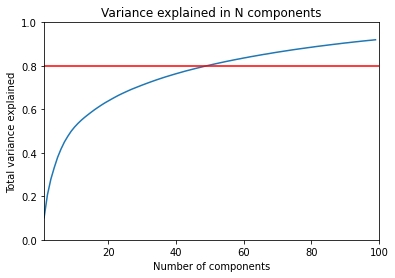

In [ ]:
variance_explained(X, end = 100, max_var = .8)

In [ ]:
svd = TruncatedSVD(n_components=50)
svd.fit(X)
svd.explained_variance_ratio_.sum()

0.8036009159771638

In [ ]:
X_svd = svd.transform(X)
X_train_svd, X_test_svd, y_train_svd, y_test_svd = train_test_split(X_svd,y, test_size =  .25, random_state = 123)

In [ ]:
params = {'C':[0.1, 1, 10], 'penalty':['l1','l2' 'elasticnet', 'none']}
grid_search_logit(X_train_svd, X_test_svd, y_train_svd, y_test_svd,params)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best score: 0.849
Best parameters set:
	C: 0.1
	penalty: 'none'
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       446
           1       0.83      0.78      0.80       178

    accuracy                           0.89       624
   macro avg       0.87      0.86      0.86       624
weighted avg       0.89      0.89      0.89       624



[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.9s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/

In [ ]:
params = {'learning_rate' : [0.01, 0.1, 1], 'n_estimators' :[100, 200, 500], 'max_features' : ['sqrt', 'log2'],'min_samples_leaf' :[20,30,40]}
grid_search_gbc(X_train_svd, X_test_svd, y_train_svd, y_test_svd,params)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  7.2min finished


Best score: 0.832
Best parameters set:
	learning_rate: 0.1
	max_features: 'sqrt'
	min_samples_leaf: 40
	n_estimators: 500
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       446
           1       0.81      0.71      0.75       178

    accuracy                           0.87       624
   macro avg       0.85      0.82      0.83       624
weighted avg       0.87      0.87      0.87       624



In [ ]:
params = {'C' : [0.1, 1, 10], 'gamma' : [1, 0.1, 0.01], 'kernel' : ['rbf', 'poly', 'sigmoid']}
grid_search_SVM(X_train_svd, X_test_svd, y_train_svd, y_test_svd, params)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   57.8s


Best score: 0.857
Best parameters set:
	C: 10
	gamma: 0.1
	kernel: 'rbf'
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       446
           1       0.85      0.75      0.79       178

    accuracy                           0.89       624
   macro avg       0.88      0.85      0.86       624
weighted avg       0.89      0.89      0.89       624



[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  1.3min finished


In [ ]:
log_best_att = LogisticRegression(C = 0.1, penalty='none')
log_best_att.fit(X_train_svd,y_train_svd)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
gbc_best_att = GradientBoostingClassifier(learning_rate=.1, max_features = 'log2', min_samples_leaf=40,n_estimators=500)
gbc_best_att.fit(X_train_svd, y_train_svd)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=40, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
svm_best_att = SVC(C=10, gamma=1, kernel='rbf')
svm_best_att.fit(X_train_svd,y_train_svd)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
acc_report(log_best_att, X_test_svd, y_test_svd)

,accuracy,precision,recall,auc,f1
0,0.891026,0.831325,0.775281,0.85625,0.802326


In [ ]:
acc_report(gbc_best_att, X_test_svd, y_test_svd)

,accuracy,precision,recall,auc,f1
0,0.866987,0.827586,0.674157,0.809052,0.743034


In [ ]:
acc_report(svm_best_att, X_test_svd, y_test_svd)

,accuracy,precision,recall,auc,f1
0,0.886218,0.836478,0.747191,0.844448,0.789318


### Other Attributes

In [ ]:
%cd /content/drive/MyDrive/NLP Final Project/
df_attributes_agg = pd.read_pickle('df_w_attributes_agg')

/content/drive/MyDrive/NLP Final Project


In [ ]:
df_attributes_agg = df_attributes_agg.assign(Recommend = [1 if x >= 4 else 0 for x in df_attributes_agg['rating'] ])

In [ ]:
X_att = df_attributes_agg.iloc[:,2:-1]
y = df_attributes_agg['Recommend']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_att,y, test_size =  .25, random_state = 123)

In [ ]:
params = {'C':[0.1, 1, 10], 'penalty':['l1','l2' 'elasticnet', 'none']}
grid_search_logit(X_train, X_test, y_train, y_test,params)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    4.9s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/

Best score: 0.875
Best parameters set:
	C: 0.1
	penalty: 'none'
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       446
           1       0.88      0.79      0.83       178

    accuracy                           0.91       624
   macro avg       0.90      0.87      0.88       624
weighted avg       0.91      0.91      0.91       624



/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring(

In [ ]:
params = {'learning_rate' : [0.01, 0.1, 1], 'n_estimators' :[100, 200, 500], 'max_features' : ['sqrt', 'log2'],'min_samples_leaf' :[20,30,40]}
grid_search_gbc(X_train, X_test, y_train, y_test,params)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  4.9min finished


Best score: 0.877
Best parameters set:
	learning_rate: 0.1
	max_features: 'log2'
	min_samples_leaf: 30
	n_estimators: 200
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       446
           1       0.90      0.79      0.84       178

    accuracy                           0.92       624
   macro avg       0.91      0.88      0.89       624
weighted avg       0.92      0.92      0.91       624



In [ ]:
params = {'C' : [0.1, 1, 10], 'gamma' : [1, 0.1, 0.01], 'kernel' : ['rbf', 'poly', 'sigmoid']}
grid_search_SVM(X_train, X_test, y_train, y_test, params)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   26.8s


Best score: 0.866
Best parameters set:
	C: 10
	gamma: 0.01
	kernel: 'rbf'
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       446
           1       0.90      0.75      0.82       178

    accuracy                           0.91       624
   macro avg       0.90      0.86      0.88       624
weighted avg       0.91      0.91      0.90       624



[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   34.3s finished


In [ ]:
log_best_att = LogisticRegression(C = 0.1, penalty='none')
log_best_att.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
gbc_best_att = GradientBoostingClassifier(learning_rate=.1, max_features = 'log2', min_samples_leaf=30,n_estimators=200)
gbc_best_att.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=30, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
svm_best_att = SVC(C=10, gamma=0.01, kernel='rbf')
svm_best_att.fit(X_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
acc_report(log_best_att, X_test, y_test)

,accuracy,precision,recall,auc,f1
0,0.908654,0.875776,0.792135,0.873646,0.831858


In [ ]:
acc_report(gbc_best_att, X_test, y_test)

,accuracy,precision,recall,auc,f1
0,0.921474,0.90566,0.808989,0.887678,0.854599


In [ ]:
acc_report(svm_best_att, X_test, y_test)

,accuracy,precision,recall,auc,f1
0,0.88141,0.833333,0.730337,0.836021,0.778443


### Combined

In [ ]:
df_attributes_agg = df_attributes_agg.drop(['Length','Lexical Diversity', 'Recommend'], axis = 1)

NameError: ignored

In [ ]:
df_comb= pd.merge(left = df_attributes_agg, right = df_glove_agg, left_on = "doctorID", right_on = "doctorID")

NameError: ignored

In [ ]:
%cd /content/drive/MyDrive/NLP Final Project/

df_comb.to_pickle('df_comb')
df_comb.to_csv('df_comb.csv')

In [ ]:
df_comb = pd.read_pickle('df_comb')

In [ ]:
df_comb.describe()

In [ ]:
X_comb = df_comb.iloc[:,2:-1]
X_comb = X_comb.drop('rating_y', axis = 1)
y = df_comb['Recommend']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_comb,y, test_size =  .25, random_state = 123)

In [ ]:
params = {'C':[0.1, 1, 10], 'penalty':['l1','l2' 'elasticnet', 'none']}
grid_search_logit(X_train, X_test, y_train, y_test,params)

In [ ]:
params = {'learning_rate' : [0.01, 0.1, 1], 'n_estimators' :[100, 200, 500], 'max_features' : ['sqrt', 'log2'],'min_samples_leaf' :[20,30,40]}
grid_search_gbc(X_train, X_test, y_train, y_test,params)

In [ ]:
params = {'C' : [0.1, 1, 10], 'gamma' : [1, 0.1, 0.01], 'kernel' : ['rbf', 'poly', 'sigmoid']}
grid_search_SVM(X_train, X_test, y_train, y_test, params)

In [ ]:
gbc_best = GradientBoostingClassifier(learning_rate=.1, max_features = 'sqrt', min_samples_leaf=40,n_estimators=500)
gbc_best.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=40, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
svm_best = SVC(C=1, gamma=0.01, kernel='poly')
svm_best.fit(X_train,y_train)

In [ ]:
log_best = LogisticRegression(C = 0.1, penalty='none')
log_best.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
%cd /content/drive/MyDrive/NLP Final Project/
pickle.dump(gbc_best,open('gbc_best.pkl','wb'))
pickle.dump(log_best,open('log_best.pkl','wb'))
pickle.dump(svm_best,open('svm_best.pkl','wb'))

In [ ]:
%cd /content/drive/MyDrive/NLP Final Project/
import pickle
gbc_best = pickle.load(open('gbc_best.pkl','rb'))
log_best = pickle.load(open('log_best.pkl','rb'))

/content/drive/MyDrive/NLP Final Project


In [ ]:
predictions = log_best.predict(X_test)
print (classification_report(y_test, predictions))
print(roc_auc_score(y_test, predictions))
print(f1_score(y_test, predictions))
print(precision_score(y_test, predictions))
print(recall_score(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       446
           1       0.87      0.81      0.84       178

    accuracy                           0.91       624
   macro avg       0.90      0.88      0.89       624
weighted avg       0.91      0.91      0.91       624

0.8837607698896557
0.8430232558139534
0.8734939759036144
0.8146067415730337
0.9134615384615384


In [ ]:
predictions = gbc_best.predict(X_test)
print (classification_report(y_test, predictions))
print(roc_auc_score(y_test, predictions))
print(f1_score(y_test, predictions))
print(precision_score(y_test, predictions))
print(recall_score(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       446
           1       0.88      0.79      0.83       178

    accuracy                           0.91       624
   macro avg       0.90      0.87      0.88       624
weighted avg       0.91      0.91      0.91       624

0.8736458910666599
0.831858407079646
0.8757763975155279
0.7921348314606742
0.9086538461538461


In [ ]:
predictions = svm_best.predict(X_test)
print (classification_report(y_test, predictions))
print(roc_auc_score(y_test, predictions))
print(f1_score(y_test, predictions))
print(precision_score(y_test, predictions))
print(recall_score(y_test, predictions))
print(accuracy_score(y_test, predictions))

NameError: ignored

In [ ]:
feat_imp = pd.Series(gbc_best.feature_importances_, X_comb.columns).sort_values(ascending=False)

In [ ]:
mean = np.mean(feat_imp)
sd = np.std(feat_imp)

In [ ]:
def z_score(score, mean, sd):
  return (score - mean)/sd

In [ ]:
feat_imp.apply(lambda x: z_score(x, mean, sd)).head(10)

NLTK_Compound    9.036773
AWE110           5.223874
polarity         4.873447
AWE128           4.256393
AWE96            4.222326
AWE114           3.448999
Topic_9          2.799069
AWE164           1.859992
AWE63            1.659525
AWE113           1.628144
dtype: float64

In [ ]:
feat_imp_log = pd.Series(log_best.coef_.tolist()[0], X_comb.columns)

In [ ]:
import numpy as np

In [ ]:
feat_imp_log.apply(np.exp).head(14)

Topic_0     0.755599
Topic_1     1.123145
Topic_2     0.969296
Topic_3     0.490265
Topic_4     0.884547
Topic_5     0.444070
Topic_6     1.341638
Topic_7     0.491607
Topic_8     1.049300
Topic_9     2.522715
Topic_10    1.972786
Topic_11    1.721536
Topic_12    0.951497
Topic_13    0.946457
dtype: float64

# Task 7